In [2]:
#data science packages
import pandas as pd
import numpy as np

#visualisation packages
import plotly.io as pio
import plotly.graph_objects as go
import pyreadstat
import matplotlib.pyplot as plt
import matplotlib.colorbar as mcb
import seaborn as sns

#packages needed to plot on a map
from adjustText import adjust_text
import pyogrio
import geopandas as gpd
import pycountry


In [3]:
pio.renderers.default='notebook'
import plotly.offline as pyo
pyo.init_notebook_mode()

In [4]:
df, meta = pyreadstat.read_sav("lrf_wrp_2021_full_data.sav")
df.head()

WPID_RANDOM  WP5        Country       WGT    Year  GlobalRegion  \
0  174262180.0  1.0  United States  2.132627  2021.0           6.0   
1  115327451.0  1.0  United States  0.620385  2021.0           6.0   
2  189972125.0  1.0  United States  0.610080  2021.0           6.0   
3  173358289.0  1.0  United States  0.490774  2021.0           6.0   
4  183251831.0  1.0  United States  1.910021  2021.0           6.0   

   country.in.both.waves  CountryIncomeLevel2021  CountryIncomeLevel2019  \
0                    1.0                     4.0                     NaN   
1                    1.0                     4.0                     NaN   
2                    1.0                     4.0                     NaN   
3                    1.0                     4.0                     NaN   
4                    1.0                     4.0                     NaN   

     PROJWT_2021  ...  REGION_ZAF  REGION2_ZMB  REGION_ZWE  Q2_1_2019A  \
0  562058.627707  ...         NaN          NaN         NaN         NaN   
1  163503.920074  ...         NaN          NaN         NaN         NaN   
2  160787.958907  ...         NaN          NaN         NaN         NaN   
3  129344.456130  ...         NaN          NaN         NaN         NaN   
4  503390.265930  ...         NaN          NaN         NaN         NaN   

   Q2_1_2019B  Q5A_2019  Q5B_2019  Q5C_2019  Q5D_2019  Q5F_2019  
0         NaN       NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN       NaN  
2         NaN       NaN       NaN       NaN       NaN       NaN  
3         NaN       NaN       NaN       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 208 columns]

In [5]:
df_nepal = df[df.Country=='Nepal']
df_nepal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 107875 to 280087
Columns: 208 entries, WPID_RANDOM to Q5F_2019
dtypes: float64(207), object(1)
memory usage: 3.3+ MB


In [6]:

#filter out countries with number of data points less than 1200
df = df.groupby('Country').filter(lambda x: x['Country'].count() >= 1200)

df_1=df[df['Q1'].isnull()]

Plot the number of participants from each country

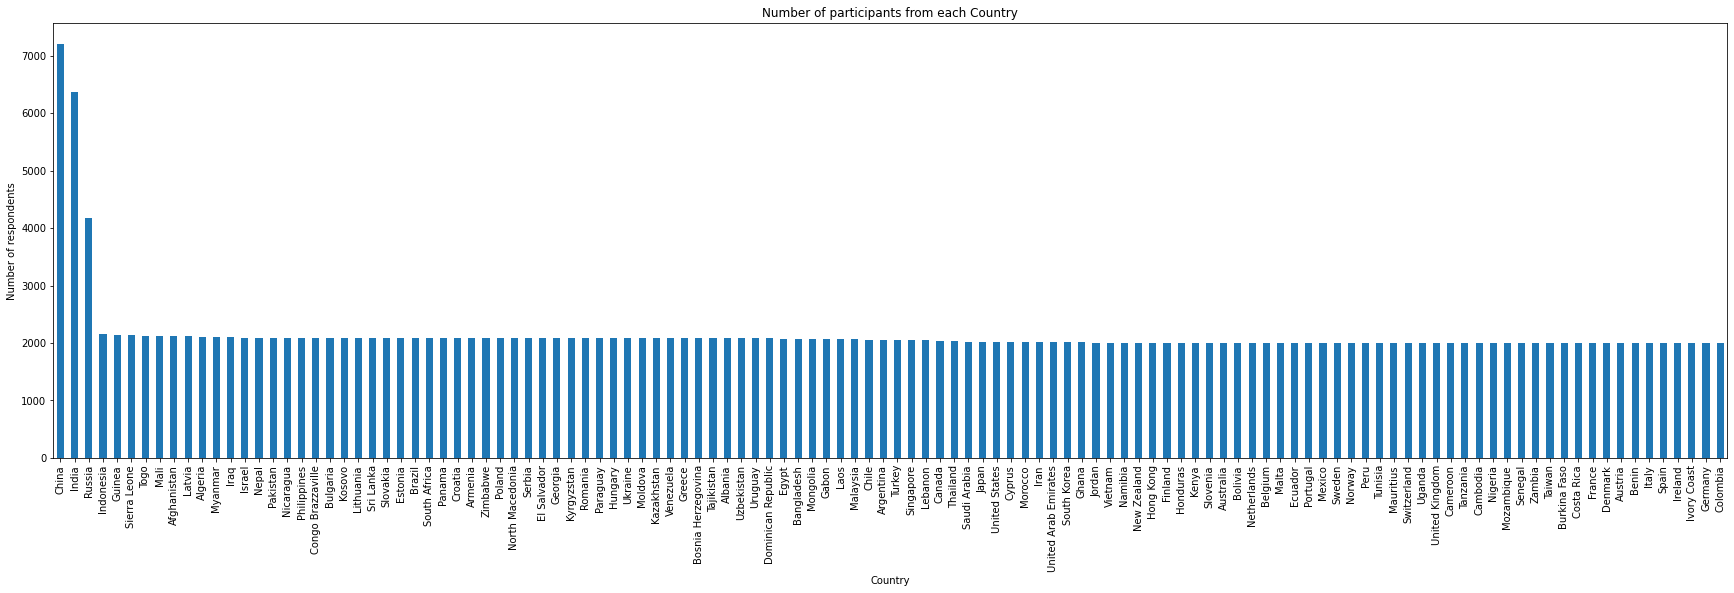

In [7]:
chart = df['Country'].value_counts().plot(kind='bar',
                                    figsize=(30,8),
                                    title="Number of participants from each Country")
chart.set_xlabel("Country")
chart.set_ylabel("Number of respondents")
plt.xticks(rotation = 90)
plt.show()

Most participants are from China, India, and Russia

# Step 1: Simple Exploratory Data Analysis

## Step 1.1. Just some simple bar charts

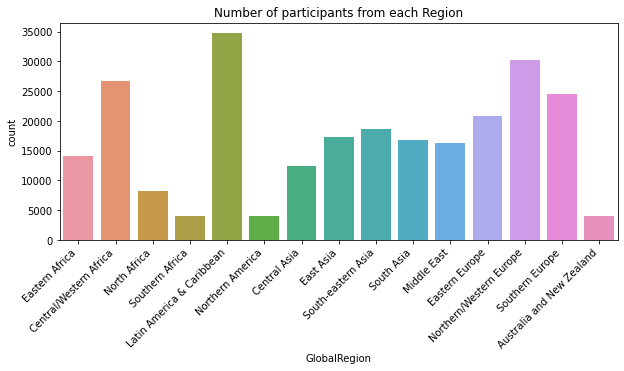

In [8]:
plt.figure(figsize=(10,4))
chart=sns.countplot(x='GlobalRegion', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
chart.set_xticklabels(['Eastern Africa','Central/Western Africa','North Africa','Southern Africa','Latin America & Caribbean','Northern America','Central Asia','East Asia','South-eastern Asia','South Asia','Middle East','Eastern Europe','Northern/Western Europe','Southern Europe','Australia and New Zealand'])
chart.set_title('Number of participants from each Region')
plt.show()

Global region wise, most of the participants are from Latin America & Caribbean, Nothern/western Europe, and Central Western Africa.

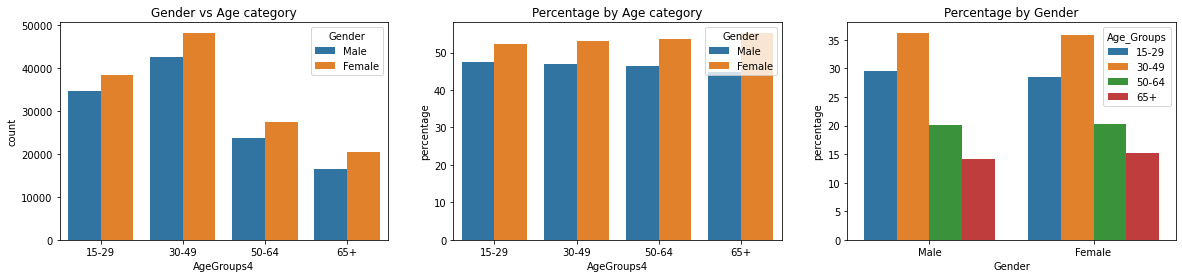

In [9]:
# Define the mapping of values to labels
age_labels = {1: '15-29', 2: '30-49', 3: '50-64', 4: '65+'}
gender_labels = {1: 'Male', 2: 'Female'}

# Create the plot
fig, axes = plt.subplots(1,3,figsize=(20,4))
#chart = sns.countplot(x='AgeGroups4', data=df, hue='Gender', hue_order=[1, 2], width=0.4, ax=axes[0])
chart = sns.countplot(x='AgeGroups4', data=df, hue='Gender', hue_order=[1, 2], ax=axes[0])
sns.move_legend(chart, "upper right", title='Gender')
chart.set_xticks([0, 1, 2, 3])
chart.set_title("Gender vs Age category")

# Rename the x-axis tick labels
new_labels = [age_labels[val] for val in range(1, 5)]
chart.set_xticklabels(new_labels)

# Rename the legend labels
handles, labels = axes[0].get_legend_handles_labels()
new_labels = [gender_labels[int(label)] for label in labels]
axes[0].legend(handles, new_labels, title='Gender')


grouped = df.groupby(['AgeGroups4', 'Gender']).size().reset_index(name='count')
totals = grouped.groupby('AgeGroups4')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='AgeGroups4')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100

# Create the plot
#chart = sns.barplot(x='AgeGroups4', y='percentage', hue='Gender', data=grouped, hue_order=[1, 2], width=0.4,ax=axes[1])
chart = sns.barplot(x='AgeGroups4', y='percentage', hue='Gender', data=grouped, hue_order=[1, 2], ax=axes[1])

sns.move_legend(chart, "upper right", title='Gender')
chart.set_xticklabels([age_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Age category")

# Rename the legend labels
handles, labels = axes[1].get_legend_handles_labels()
new_labels = [gender_labels[int(label)] for label in labels]
axes[1].legend(handles, new_labels, title='Gender')

grouped_1 = df.groupby(['Gender', 'AgeGroups4']).size().reset_index(name='count')
totals = grouped_1.groupby('Gender')['count'].sum().reset_index(name='total')
grouped_1 = pd.merge(grouped_1, totals, on='Gender')
grouped_1['percentage'] = grouped_1['count'] / grouped_1['total'] * 100

# Create the plot
#chart = sns.barplot(x='Gender', y='percentage', hue='AgeGroups4', data=grouped_1, hue_order=[1, 2,3,4], width=0.4,ax=axes[2])
chart = sns.barplot(x='Gender', y='percentage', hue='AgeGroups4', data=grouped_1, hue_order=[1, 2,3,4], ax=axes[2])

sns.move_legend(chart, "upper right", title='AgeGroups4')

chart.set_xticklabels([gender_labels[val] for val in range(1, 3)])
chart.set_title("Percentage by Gender")

# Rename the legend labels
handles, labels = axes[2].get_legend_handles_labels()
new_labels = [age_labels[int(label)] for label in labels]
axes[2].legend(handles, new_labels, title='Age_Groups')

# Show the plot
plt.show()


It is clear by from the counts graphs, the female participants are higher in all the age categories. The highest percentage of females by age category is from 'above 65+' age category. And the highest percentage of males from age group 15-29.

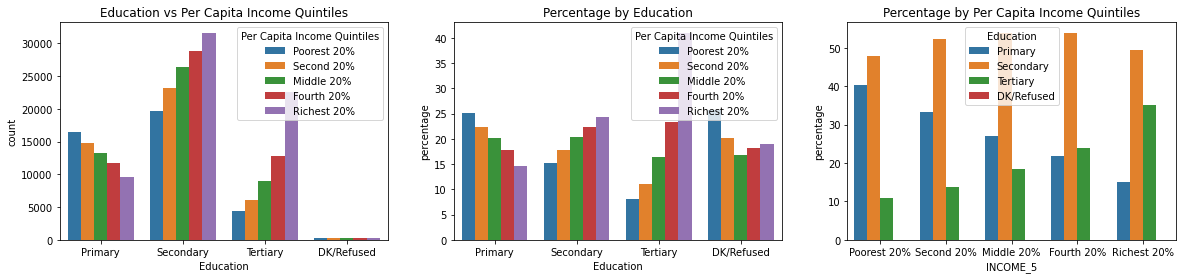

In [10]:
# Define the mapping of values to labels
edu_labels = {1: 'Primary', 2: 'Secondary', 3: 'Tertiary', 4: 'DK/Refused'}
income_labels = {1: 'Poorest 20%', 2: 'Second 20%', 3: 'Middle 20%', 4: 'Fourth 20%', 5: 'Richest 20%'}

# Create the plot
fig, axes = plt.subplots(1,3,figsize=(20,4))
#chart = sns.countplot(x='Education', data=df, hue='INCOME_5', hue_order=[1, 2,3,4,5], width=0.4, ax=axes[0])
chart = sns.countplot(x='Education', data=df, hue='INCOME_5', hue_order=[1, 2,3,4,5], ax=axes[0])

sns.move_legend(chart, "upper right", title='Per Capita Income Quintiles')
chart.set_xticks([0, 1, 2, 3])
chart.set_title("Education vs Per Capita Income Quintiles")

# Rename the x-axis tick labels
new_labels = [edu_labels[val] for val in range(1, 5)]
chart.set_xticklabels(new_labels)

# Rename the legend labels
handles, labels = axes[0].get_legend_handles_labels()
new_labels = [income_labels[int(label)] for label in labels]
axes[0].legend(handles, new_labels, title='Per Capita Income Quintiles')


grouped = df.groupby(['Education', 'INCOME_5']).size().reset_index(name='count')
totals = grouped.groupby('Education')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='Education')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100

# Create the plot
chart = sns.barplot(x='Education', y='percentage', hue='INCOME_5', data=grouped, hue_order=[1, 2,3,4,5], ax=axes[1])
sns.move_legend(chart, "upper right", title='Per Capita Income Quintiles')
chart.set_xticklabels([edu_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Education")

# Rename the legend labels
handles, labels = axes[1].get_legend_handles_labels()
new_labels = [income_labels[int(label)] for label in labels]
axes[1].legend(handles, new_labels, title='Per Capita Income Quintiles')

grouped_1 = df.groupby(['INCOME_5', 'Education']).size().reset_index(name='count')
totals = grouped_1.groupby('INCOME_5')['count'].sum().reset_index(name='total')
grouped_1 = pd.merge(grouped_1, totals, on='INCOME_5')
grouped_1['percentage'] = grouped_1['count'] / grouped_1['total'] * 100

# Create the plot
chart = sns.barplot(x='INCOME_5', y='percentage', hue='Education', data=grouped_1, hue_order=[1, 2,3,4], ax=axes[2])
sns.move_legend(chart, "upper right", title='Education')
chart.set_xticklabels([income_labels[val] for val in range(1, 6)])
chart.set_title("Percentage by Per Capita Income Quintiles")

# Rename the legend labels
handles, labels = axes[2].get_legend_handles_labels()
new_labels = [edu_labels[int(label)] for label in labels]
axes[2].legend(handles, new_labels, title='Education')

# Show the plot
plt.show()

Most percentage of people with secondary and thirtiary education are from richest 20%. However when the percentages are calsulated by percapita income levels the highest percentages for all income categories are from secondary eduvated people which suggest most of the students stop thir esducation from secondary level without any university education.

Question 1 : Feel More, Less or About as Safe Compared With Five Years Ago

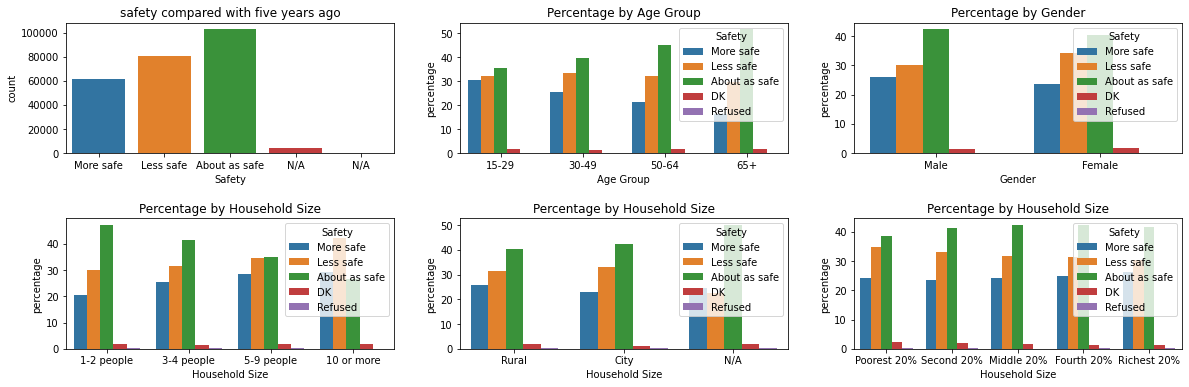

In [11]:
# Define the mapping of values to labels
safety_labels = {1: 'More safe', 2: 'Less safe', 3: 'About as safe', 98: 'DK', 99: 'Refused'}
age_labels = {1: '15-29', 2: '30-49', 3: '50-64', 4: '65+'}
gender_labels = {1: 'Male', 2: 'Female'}
housesize_labels = {1: '1-2 people', 2: '3-4 people', 3: '5-9 people', 4: '10 or more'}
urban_labels = {1: 'Rural', 2: 'City', 9: 'DK/Refused'}
income_labels = {1: 'Poorest 20%', 2: 'Second 20%', 3: 'Middle 20%', 4: 'Fourth 20%', 5: 'Richest 20%'}

# Create the plot
fig, axes = plt.subplots(2,3,figsize=(20,6))

chart=sns.countplot(x='Q1', data=df,  ax=axes[0,0]);
chart.set_xticks([0,1,2,3,4])
chart.set_title("safety compared with five years ago")
# Set the x-axis tick labels
new_labels = [safety_labels[val] if val in safety_labels else "N/A" for val in range(1, 6)]
chart.set_xticklabels(new_labels)
chart.set_xlabel('Safety')


grouped = df.groupby(['AgeGroups4', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('AgeGroups4')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='AgeGroups4')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='AgeGroups4', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99], ax=axes[0,1])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([age_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Age Group")
chart.set_xlabel('Age Group')
# Rename the legend labels
handles, labels = axes[0,1].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[0,1].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['Gender', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('Gender')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='Gender')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='Gender', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99], ax=axes[0,2])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([gender_labels[val] for val in range(1, 3)])
chart.set_title("Percentage by Gender")
chart.set_xlabel('Gender')
# Rename the legend labels
handles, labels = axes[0,2].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[0,2].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['HouseholdSize', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('HouseholdSize')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='HouseholdSize')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='HouseholdSize', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99],ax=axes[1,0])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([housesize_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Household Size")
chart.set_xlabel('Household Size')
# Rename the legend labels
handles, labels = axes[1,0].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[1,0].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['Urbanicity', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('Urbanicity')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='Urbanicity')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='Urbanicity', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99], ax=axes[1,1])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([urban_labels[val] if val in urban_labels else "N/A" for val in range(1, 4)])
chart.set_title("Percentage by Household Size")
chart.set_xlabel('Household Size')
# Rename the legend labels
handles, labels = axes[1,1].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[1,1].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['INCOME_5', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('INCOME_5')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='INCOME_5')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='INCOME_5', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99],ax=axes[1,2])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([income_labels[val] for val in range(1, 6)])
chart.set_title("Percentage by Household Size")
chart.set_xlabel('Household Size')
# Rename the legend labels
handles, labels = axes[1,2].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[1,2].legend(handles, new_labels, title='Safety')

# Adjust horizontal space between subplots
fig.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()



Based on the safety propotion by Gender, highest percentage of males confims that they are safe (more safe and about as safe), while highest percentage of females feels that they are unsafe. Based on safety propotion by Age Group, highest percentsge of older paerticipants (over 65 years of age) feels that they are about as safe.  The percentage of peoples with more that 10 or more memebers feels that they are unsafe. The higher percentage of people in rural area feel that they are more safe that city people. 

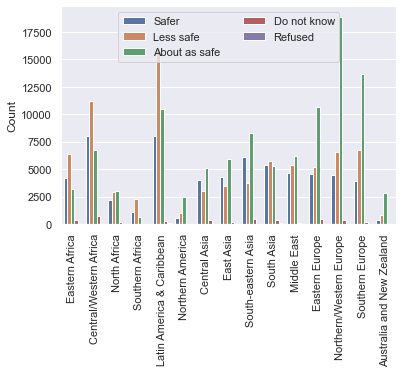

In [12]:
sns.set(font_scale=1)
#fig, axes = plt.subplots(figsize=(12,4))

#fig.suptitle('Feel More, Less or About as Safe Compared With Five Years Ago')
g1=sns.countplot(x='GlobalRegion', data=df, hue='Q1');
g1.legend(loc='upper center',ncol=2, labels=['Safer','Less safe','About as safe','Do not know','Refused'])
#sns.move_legend(g1, "upper right", title='Safety', labels=['More safe','Less safe','About as safe','DK','Refused'])
g1.set_xticklabels(g1.get_xticklabels(), rotation = 90)
g1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
g1.set_xticklabels(['Eastern Africa','Central/Western Africa','North Africa','Southern Africa','Latin America & Caribbean','Northern America','Central Asia','East Asia','South-eastern Asia','South Asia','Middle East','Eastern Europe','Northern/Western Europe','Southern Europe','Australia and New Zealand'])
g1.set_xlabel('')
g1.set_ylabel('Count')


plt.savefig('Figures/safety_region.pdf',bbox_inches="tight")
plt.show()

All the African regions except North Africa, Latin & Carribian region feels that they are less safe while North American, Asia, Middle east Europe, and Acutralia/NZ areas feels that they are safe.

Here, the highest propotion of pasific (NZ and Ausi) participants followed by Europeans show that they are feeling about as safe compared to last five years. However when considering north and south americans as one, highest propositon of them feels that they are less safe followed by Africans. As compared with above count graph, the feeling of safety from north and south americans are completely opposite. So below graphs comapre the propotions seperately

Q2_1 - Riska to safety

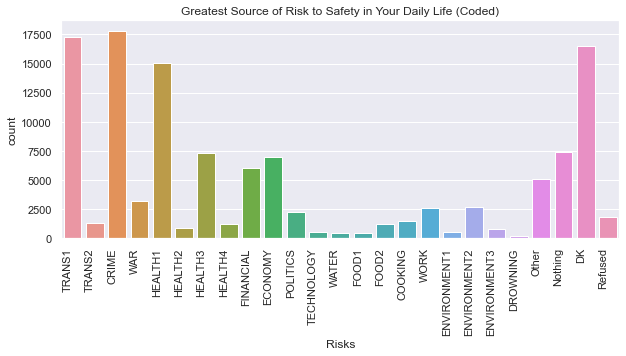

In [13]:
plt.figure(figsize=(10,4))
chart=sns.countplot(x='Q2_1', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_xlabel('Risks')
chart.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
chart.set_xticklabels(['TRANS1','TRANS2','CRIME','WAR','HEALTH1','HEALTH2','HEALTH3','HEALTH4','FINANCIAL','ECONOMY','POLITICS','TECHNOLOGY','WATER','FOOD1','FOOD2','COOKING','WORK','ENVIRONMENT1','ENVIRONMENT2','ENVIRONMENT3','DROWNING','Other','Nothing','DK','Refused'])
chart.set_title('Greatest Source of Risk to Safety in Your Daily Life (Coded)')
plt.savefig('Figures/risks.pdf')
plt.show()


People found transportation, crime/ violance, and personal health related issues are the most risky sources for daily lives.

when the age increases above 60 years, People start to worry about personal health and cooking and other household accidents.  Technology as a risk to safety affects to all peoplr irrespective of their age.

When comparing the risks regin wise, we can see that Asians risks health issues and Pacifics and Europeans are more concerning over transpotation related isuues. Americans and Africans risk crime related issues. 

## Step 1.2: Spider chart of each region perception to risks and experience to disasters

In [14]:
df = df.astype({"GlobalRegion": int})
Africa = ['Eastern Africa','Central/Western Africa','North Africa','Southern Africa']
AmericaANZ = ['Latin America & Caribbean','Northern America','Australia and New Zealand']
Asia = ['Central Asia','East Asia','South-eastern Asia','South Asia','Middle East']
Europe = ['Eastern Europe','Northern/Western Europe','Southern Europe']

In [15]:
#Make Africa Scatterpolar chart
Region = Africa
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)

fig = go.Figure( layout=layout)

for m in range(1,4):
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[m],
        fill='toself'
        
    ))

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

# pio.write_image(fig,'./Figures/Risks_perception_Africa.pdf')
#fig.write_image('./Figures/Risks_perception_Africa.pdf') 
fig.show()

In [16]:
#Make AmericaANZ Scatterpolar chart
Region = AmericaANZ
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [5,6,15]:
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_perception_AmericaANZ.pdf') 
fig.show()

In [17]:
#Make Asia Scatterpolar chart
Region = Asia
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in range(7,12):
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_perception_Asia.pdf') 
fig.show()

In [18]:
#Make Europe Scatterpolar chart
Region = Europe
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [12,13,14]:
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_perception_Europe.pdf') 
fig.show()

In [19]:
df_n = df.drop(df[(df['Q5E'] > 4)].index)
df_n = df_n.drop(df_n[(df_n['Q4E'] > 3)].index)

## Step 1.3: Lets compare the gap between what people thinks with what they actually experienced 

In [20]:
#Make Africa Scatterpolar chart
Region = Africa
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)

fig = go.Figure( layout=layout)

for m in range(1,4):
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<5]
    dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[m],
        fill='toself'
        
    ))

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="center", x=0.35,orientation="h"),
    
)

pio.write_image(fig,'./Figures/Risks_experience_Africa.pdf')

fig.show()

In [21]:
Region = AmericaANZ
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [5,6,15]:
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<5]
    dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="center", x=0.35,orientation="h"),
    )

pio.write_image(fig,'./Figures/Risks_experience_AmericaANZ.pdf') 
fig.show()

In [22]:
Region = Asia
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in range(7,12):
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<5]
    dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="center", x=0.35,orientation="h"),
    )

pio.write_image(fig,'./Figures/Risks_experience_Asia.pdf') 
fig.show()

In [23]:
#Make Europe Scatterpolar chart
Region = Europe
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [12,13,14]:
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<5]
    dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="center", x=0.35,orientation="h"),
    
)

pio.write_image(fig,'./Figures/Risks_experience_Europe.pdf') 
fig.show()

# Step 2: Plot country statistics on a map

In [24]:
def get_country_acronym(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return None

# Assuming you have a pandas DataFrame named 'df' and the country names are in a column named 'Country'
unique_countries = df['Country'].unique()

country_acronyms = {country: get_country_acronym(country) for country in unique_countries}

#fix the country acronym that is not available in the pycountry package
country_acronyms['Laos']='LAO'
country_acronyms['Bosnia Herzegovina']='BiH'
country_acronyms['Congo Brazzaville'] = 'CG'
country_acronyms['Ivory Coast'] = 'IC'

# Update country names to acronyms
df['Country_short'] = df['Country'].map(country_acronyms)
df.head()


WPID_RANDOM  WP5        Country       WGT    Year  GlobalRegion  \
0  174262180.0  1.0  United States  2.132627  2021.0             6   
1  115327451.0  1.0  United States  0.620385  2021.0             6   
2  189972125.0  1.0  United States  0.610080  2021.0             6   
3  173358289.0  1.0  United States  0.490774  2021.0             6   
4  183251831.0  1.0  United States  1.910021  2021.0             6   

   country.in.both.waves  CountryIncomeLevel2021  CountryIncomeLevel2019  \
0                    1.0                     4.0                     NaN   
1                    1.0                     4.0                     NaN   
2                    1.0                     4.0                     NaN   
3                    1.0                     4.0                     NaN   
4                    1.0                     4.0                     NaN   

     PROJWT_2021  ...  REGION2_ZMB  REGION_ZWE  Q2_1_2019A  Q2_1_2019B  \
0  562058.627707  ...          NaN         NaN         NaN         NaN   
1  163503.920074  ...          NaN         NaN         NaN         NaN   
2  160787.958907  ...          NaN         NaN         NaN         NaN   
3  129344.456130  ...          NaN         NaN         NaN         NaN   
4  503390.265930  ...          NaN         NaN         NaN         NaN   

   Q5A_2019  Q5B_2019  Q5C_2019  Q5D_2019  Q5F_2019  Country_short  
0       NaN       NaN       NaN       NaN       NaN            USA  
1       NaN       NaN       NaN       NaN       NaN            USA  
2       NaN       NaN       NaN       NaN       NaN            USA  
3       NaN       NaN       NaN       NaN       NaN            USA  
4       NaN       NaN       NaN       NaN       NaN            USA  

[5 rows x 209 columns]

In [25]:
lands = gpd.read_file("./shapefiles/continent.shp")
lands = lands[lands['CONTINENT'] != 'Antarctica']
lands

CONTINENT                                           geometry
0           Asia  MULTIPOLYGON (((93.27554 80.26361, 93.31304 80...
1  North America  MULTIPOLYGON (((-25.28167 71.39166, -25.32889 ...
2         Europe  MULTIPOLYGON (((58.06138 81.68776, 57.98055 81...
3         Africa  MULTIPOLYGON (((0.69465 5.77337, 0.66667 5.803...
4  South America  MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ...
5        Oceania  MULTIPOLYGON (((-177.39334 28.18416, -177.3958...
6      Australia  MULTIPOLYGON (((142.27997 -10.26556, 142.21053...

In [26]:
regions = gpd.read_file("./shapefiles/World_Countries__Generalized_.shp")
regions = regions[regions['COUNTRY'] != 'Antarctica']
regions = regions[['COUNTRY','geometry']]
regions

COUNTRY                                           geometry
0          Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...
1              Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...
2              Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...
3       American Samoa  POLYGON ((-170.74390 -14.37555, -170.74942 -14...
4              Andorra  POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...
..                 ...                                                ...
246            Vietnam  MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...
247  Wallis and Futuna  MULTIPOLYGON (((-178.06082 -14.32389, -178.137...
248              Yemen  MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...
249             Zambia  POLYGON ((30.21302 -14.98172, 30.21916 -15.096...
250           Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...

[250 rows x 2 columns]

In [27]:
regions['COUNTRY'] = regions['COUNTRY'].replace('Russian Federation', 'Russia')
regions['COUNTRY'] = regions['COUNTRY'].replace('Bosnia and Herzegovina', 'Bosnia Herzegovina')
regions['COUNTRY'] = regions['COUNTRY'].replace('Congo', 'Congo Brazzaville')
regions['COUNTRY'] = regions['COUNTRY'].replace('Palestinian Territory', 'Palestine')
regions['COUNTRY'] = regions['COUNTRY'].replace('Turkiye', 'Turkey')
regions['COUNTRY'] = regions['COUNTRY'].replace("Côte d'Ivoire", 'Ivory Coast')


In [28]:
#Extracting colums of countru and risks from df
df_1=df[["Country", "Q2_1","GlobalRegion"]].copy()
#then change the name of some countries
df_1['Country'] = df_1['Country'].replace('Hong Kong', 'China');
df_1['Country'] = df_1['Country'].replace('Taiwan', 'China');
df_1['Country'] = df_1['Country'].replace('Kosovo', 'Serbia');

In [29]:
df_1 = df_1.dropna(subset=['Q2_1'])
df_1 = df_1[~df_1['Q2_1'].isin([98, 99])]
df_1

Country  Q2_1  GlobalRegion
1       United States   7.0             6
2       United States   3.0             6
3       United States   3.0             6
4       United States  10.0             6
5       United States   1.0             6
...               ...   ...           ...
125905         Serbia   7.0            12
125907         Serbia  10.0            12
125908         Serbia   5.0            12
125909         Serbia   7.0            12
125910         Serbia  18.0            12

[102149 rows x 3 columns]

In [30]:
# Create a dictionary to map numerical codes to risk labels
risk_labels = {
    1: 'TRANS1',
    2: 'TRANS2',
    3: 'CRIME',
    4: 'WAR',
    5: 'HEALTH1',
    6: 'HEALTH2',
    7: 'HEALTH3',
    8: 'HEALTH4',
    9: 'FINANCIAL',
    10: 'ECONOMY',
    11: 'POLITICS',
    12: 'TECHNOLOGY',
    13: 'WATER',
    14: 'FOOD1',
    15: 'FOOD2',
    16: 'COOKING',
    17: 'WORK',
    18: 'ENVIRONMENT1',
    19: 'ENVIRONMENT2',
    20: 'ENVIRONMENT3',
    21: 'DROWNING',
    22: 'Other',
    23: 'Nothing',
}

# Replace numerical codes with risk labels using the map() method
df_1['risk_category'] = df_1['Q2_1'].map(risk_labels)
#drop NaN raws
# df_1 = df_1.dropna(subset=['risk_category'])
df_1


Country  Q2_1  GlobalRegion risk_category
1       United States   7.0             6       HEALTH3
2       United States   3.0             6         CRIME
3       United States   3.0             6         CRIME
4       United States  10.0             6       ECONOMY
5       United States   1.0             6        TRANS1
...               ...   ...           ...           ...
125905         Serbia   7.0            12       HEALTH3
125907         Serbia  10.0            12       ECONOMY
125908         Serbia   5.0            12       HEALTH1
125909         Serbia   7.0            12       HEALTH3
125910         Serbia  18.0            12  ENVIRONMENT1

[102149 rows x 4 columns]

In [31]:
globalregion_labels = {
    1: 'Eastern Africa',
    2: 'Central/Western Africa',
    3: 'North Africa',
    4: 'Southern Africa',
    5: 'Latin America & Caribbean',
    6: 'Northern America',
    7: 'Central Asia',
    8: 'East Asia',
    9: 'South-eastern Asia',
    10: 'South Asia',
    11: 'Middle East',
    12: 'Eastern Europe',
    13: 'Northern/Western Europe',
    14: 'Southern Europe',
    15: 'Australia and New Zealand',
}

# Replace numerical codes with risk labels using the map() method
df_1['globalregion_category'] = df_1['GlobalRegion'].map(globalregion_labels)
#drop NaN raws
# df_1 = df_1.dropna(subset=['globalregion_category'])
df_1

Country  Q2_1  GlobalRegion risk_category globalregion_category
1       United States   7.0             6       HEALTH3      Northern America
2       United States   3.0             6         CRIME      Northern America
3       United States   3.0             6         CRIME      Northern America
4       United States  10.0             6       ECONOMY      Northern America
5       United States   1.0             6        TRANS1      Northern America
...               ...   ...           ...           ...                   ...
125905         Serbia   7.0            12       HEALTH3        Eastern Europe
125907         Serbia  10.0            12       ECONOMY        Eastern Europe
125908         Serbia   5.0            12       HEALTH1        Eastern Europe
125909         Serbia   7.0            12       HEALTH3        Eastern Europe
125910         Serbia  18.0            12  ENVIRONMENT1        Eastern Europe

[102149 rows x 5 columns]

In [32]:
# Merge world data base with Risk Poll data base
merged = regions.merge(df_1, left_on='COUNTRY', right_on='Country')
#merged = merged.drop(merged[merged['Q2_1'] > 25].index)
merged

COUNTRY                                           geometry  \
0       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
2       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
3       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
4       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
...             ...                                                ...   
102144     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102145     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102146     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102147     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102148     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   

            Country  Q2_1  GlobalRegion risk_category globalregion_category  
0       Afghanistan   4.0            10           WAR            South Asia  
1       Afghanistan  10.0            10       ECONOMY            South Asia  
2       Afghanistan   4.0            10           WAR            South Asia  
3       Afghanistan   4.0            10           WAR            South Asia  
4       Afghanistan   4.0            10           WAR            South Asia  
...             ...   ...           ...           ...                   ...  
102144     Zimbabwe  10.0             1       ECONOMY        Eastern Africa  
102145     Zimbabwe   1.0             1        TRANS1        Eastern Africa  
102146     Zimbabwe  23.0             1       Nothing        Eastern Africa  
102147     Zimbabwe  15.0             1         FOOD2        Eastern Africa  
102148     Zimbabwe   3.0             1         CRIME        Eastern Africa  

[102149 rows x 7 columns]

In [33]:
merged_first = merged.groupby('Country').first().reset_index()
merged_first = merged_first.drop(['Q2_1', 'risk_category','GlobalRegion','COUNTRY','GlobalRegion'], axis=1)

Let's see if we can plot countries on a map

/Users/mkie815/opt/anaconda3/envs/ml/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



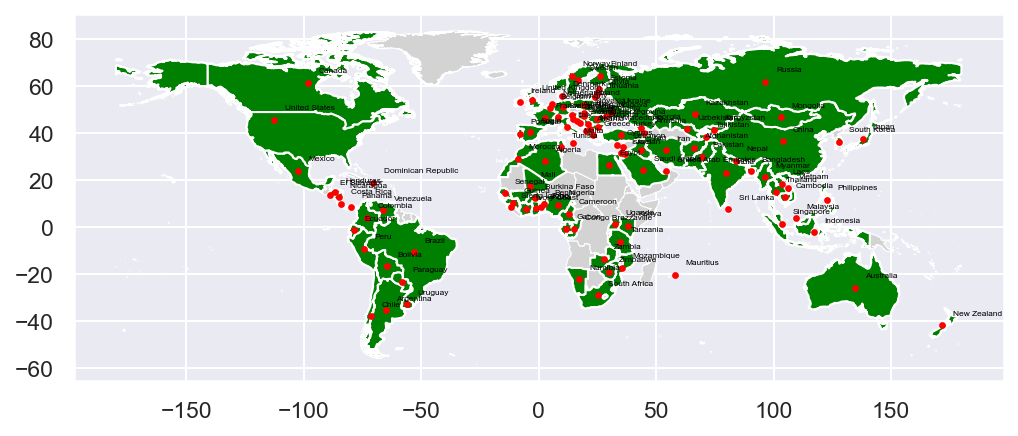

In [34]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax,facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Plot the merged_first map on top of the base map
merged_first.plot(ax=plt.gca(), column='Country', color='green', edgecolor='white')
# merged_first.plot(ax=plt.gca(), column='COUNTRY', cmap='Blues', edgecolor='white', legend=True, legend_kwds={'label': 'globalregion_category'})


# add markers
for idx, row in merged_first.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=5, color='red')
    plt.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black')

# show the plot
plt.show()

# Step 2. Plot the 3 main risks on a global map

## Step 2.1. Transport risks, experience and resilience

### 2.1.1 Transport perception map

In [35]:
participants = df.dropna(subset=['Q2_1'])
participants = df.groupby('Country').size().reset_index(name = 'Frequency_country')

merged_transport1 = merged[merged['Q2_1'].isin([1])]
merged_transport1 = merged_transport1.groupby('Country').size().reset_index(name = 'Frequency_risks')

merged_transport1 = pd.merge(merged_transport1, participants, on='Country')
#risk percentage
merged_transport1['Average_risks_percent'] = (merged_transport1['Frequency_risks'] / merged_transport1['Frequency_country']) * 100
# merge with the geomatrical data
merged_transport1 = merged_first.merge(merged_transport1, left_on='Country', right_on='Country')

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_2203/2265349828.py:37: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



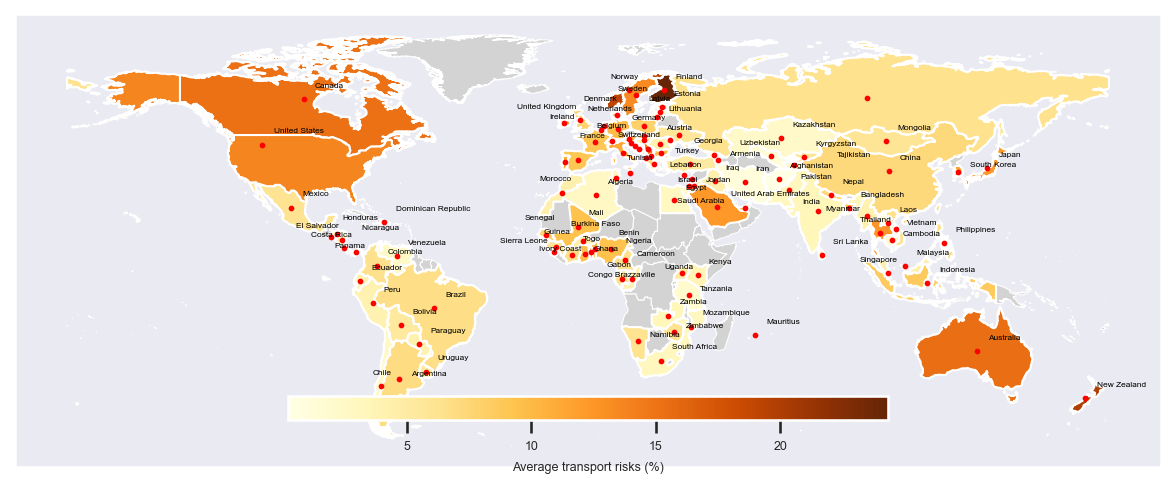

In [36]:
import matplotlib as mpl
cmap = mpl.cm.YlOrBr

# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Remove grids
ax.grid(False)

# Risk frequency
risk_plot = merged_transport1.plot(ax=ax, column='Average_risks_percent', cmap=cmap, legend=False)

# Create a colorbar within the main graph and make it horizontal
norm = plt.Normalize(merged_transport1['Average_risks_percent'].min(), merged_transport1['Average_risks_percent'].max())
cbar_ax = fig.add_axes([0.25, 0.35, 0.5, 0.02])  # Adjust the position and size of the colorbar
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.ax.set_xlabel('Average transport risks (%)',fontsize = 6)
cbar.ax.tick_params(labelsize=6)

# Add markers and store annotations in a list
texts = []
for idx, row in merged_first.iterrows():
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    if (row['globalregion_category'] != 'Eastern Europe') &  (row['globalregion_category'] != 'Southern Europe') :
    
        texts.append(ax.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black'))

# Optimize annotation positions to minimize overlaps
adjust_text(texts, ax=ax)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('./Figures/transport_map.pdf')
# Show the plo
plt.show()


### 2.1.2. Visualise the ranked map of transport experience
To calculate the experience score, the weitages are  Both = 1, Yes,personally experienced = 0.75, Yes,know someone who has experienced = 0.5, No = 0, and DK & refused = missing 

In [37]:
# Experience traffic issues
df_traffic= df[~df['Q5E'].isin([98, 99])].copy()

df_traffic['Q5E'].replace({3: 1, 1: 0.75, 2: 0.5, 4: 0}, inplace=True)

x= df_traffic.groupby('Country').mean()['Q5E']
# merge with the geomatrical data
merged_transport_experience = merged_first.merge(x, left_on='Country', right_on='Country')
merged_transport_experience.head()

Country                                           geometry  \
0  Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1      Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...   
2      Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...   
3    Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...   
4      Armenia  MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...   

       globalregion_category       Q5E  
0                 South Asia  0.327856  
1            Southern Europe  0.102307  
2               North Africa  0.311801  
3  Latin America & Caribbean  0.210000  
4               Central Asia  0.166835

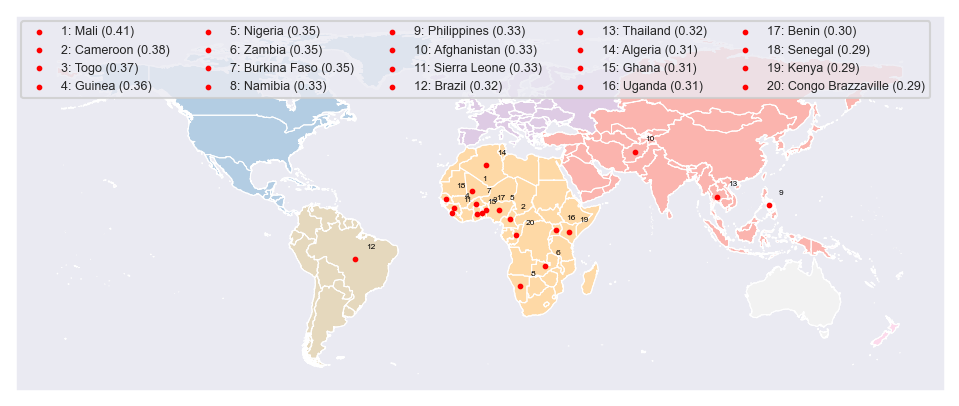

In [38]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

lands.plot(ax=ax, cmap='Pastel1', edgecolor='white', linewidth=0.5)
# Plot the base map in grey color
regions.plot(ax=ax,facecolor='none', edgecolor='white', linewidth=0.5)

# Plot the merged_first map on top of the base map
#merged_transport1.plot(ax=plt.gca(), column='Average_risks_percent', cmap='RdYlBu', edgecolor='white')
merged_transport_experience['Experience_formated'] = merged_transport_experience['Q5E'].apply(lambda x: "{:.2f}".format(x))
merged_transport_experience.loc[:,'Rank'] = merged_transport_experience['Q5E'].rank(ascending=False)
df_transport_ranked = merged_transport_experience[merged_transport_experience['Rank']<21].copy()

# add markers
for idx, row in df_transport_ranked.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    plt.annotate(f"{int(row['Rank'])}", xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black')
    
# Create a list of strings for the legend
df_transport_ranked = df_transport_ranked.sort_values(by='Rank')
legend_labels = [f'{int(row["Rank"])}: {row["Country"]} ({row["Experience_formated"]})' for _, row in df_transport_ranked.iterrows()]
plt.legend(legend_labels, loc='upper left', fontsize=6,ncol=5)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('./Figures/transport_experience_rank_map.pdf')
# show the plot
plt.show();

### Step 2.1.3: Visualise the resilience of people with transport risks


## Step 2.2: Visualise a heat map of crime risks

In [39]:
merged_crime = merged[merged['Q2_1'].isin([3])]

merged_crime = merged_crime.groupby(['Country', 'risk_category']).size().reset_index(name='Frequency_risks')

merged_crime = pd.merge(merged_crime, participants, on='Country')
#risk percentage
merged_crime['Average_risks_percent'] = (merged_crime['Frequency_risks'] / merged_crime['Frequency_country']) * 100
# merge with the geomatrical data
merged_crime = merged_first.merge(merged_crime, left_on='Country', right_on='Country')
#merged_crime

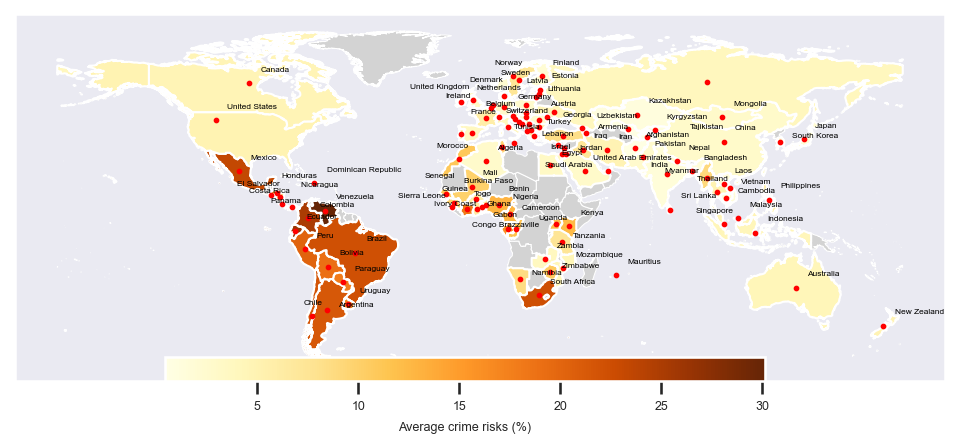

In [40]:
cmap = mpl.cm.YlOrBr
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Remove grids
ax.grid(False)

# Risk frequency
risk_plot = merged_crime.plot(ax=ax, column='Average_risks_percent', cmap=cmap, legend=False)

# Create a colorbar within the main graph and make it horizontal
norm = plt.Normalize(merged_crime['Average_risks_percent'].min(), merged_crime['Average_risks_percent'].max())
cbar_ax = fig.add_axes([0.25, 0.35, 0.5, 0.02])  # Adjust the position and size of the colorbar
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.ax.set_xlabel('Average crime risks (%)',fontsize = 6)
cbar.ax.tick_params(labelsize=6)

# Add markers and store annotations in a list
texts = []
for idx, row in merged_first.iterrows():
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    if (row['globalregion_category'] != 'Eastern Europe') &  (row['globalregion_category'] != 'Southern Europe') :
        texts.append(ax.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black'))

# Optimize annotation positions to minimize overlaps
adjust_text(texts, ax=ax)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
#plt.tight_layout()
plt.savefig('./Figures/crime_map.pdf')
# Show the plot
plt.show()


### 2.2.2. Visualise the ranked map of crime experience
To calculate the experience score, the weitages are  Both = 1, Yes,personally experienced = 0.75, Yes,know someone who has experienced = 0.5, No = 0, and DK & refused = missing 

In [41]:
# Experience traffic issues
df_crime= df[~df['Q5C'].isin([98, 99])].copy()

df_crime['Q5C'].replace({3: 1, 1: 0.75, 2: 0.5, 4: 0}, inplace=True)

x= df_crime.groupby('Country').mean()['Q5C']
# merge with the geomatrical data
merged_crime_experience = merged_first.merge(x, left_on='Country', right_on='Country')
merged_crime_experience.head()

Country                                           geometry  \
0  Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1      Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...   
2      Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...   
3    Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...   
4      Armenia  MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...   

       globalregion_category       Q5C  
0                 South Asia  0.404040  
1            Southern Europe  0.042462  
2               North Africa  0.184130  
3  Latin America & Caribbean  0.133884  
4               Central Asia  0.029175

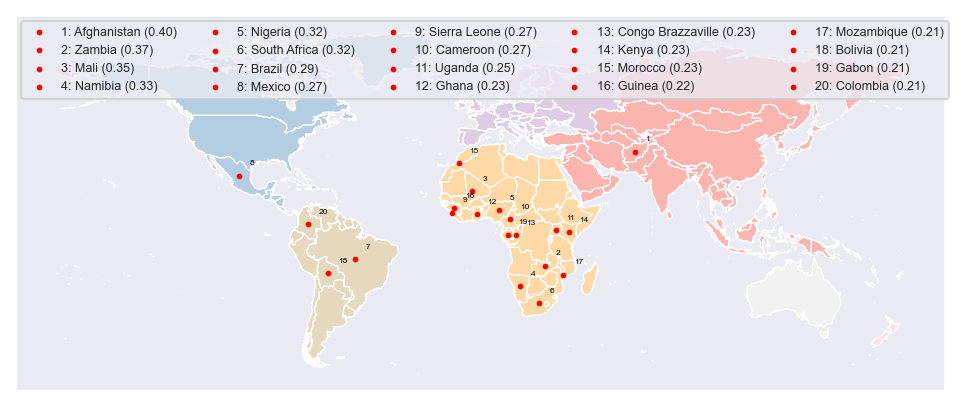

In [42]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

lands.plot(ax=ax, cmap='Pastel1', edgecolor='white', linewidth=0.5)
# Plot the base map in grey color
regions.plot(ax=ax,facecolor='none', edgecolor='white', linewidth=0.5)

# Plot the merged_first map on top of the base map
merged_crime_experience['Experience_formated'] = merged_crime_experience['Q5C'].apply(lambda x: "{:.2f}".format(x))
merged_crime_experience.loc[:,'Rank'] = merged_crime_experience['Q5C'].rank(ascending=False)
df_crime_ranked = merged_crime_experience[merged_crime_experience['Rank']<21].copy()

# add markers
for idx, row in df_crime_ranked.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    plt.annotate(f"{int(row['Rank'])}", xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black')
    
# Create a list of strings for the legend
df_crime_ranked = df_crime_ranked.sort_values(by='Rank')
legend_labels = [f'{int(row["Rank"])}: {row["Country"]} ({row["Experience_formated"]})' for _, row in df_crime_ranked.iterrows()]
plt.legend(legend_labels,  loc='upper left', fontsize=6,ncol=5)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('./Figures/crime_experience_rank_map.pdf')
# show the plot
plt.show();

# Step 3: Make risk-related indexes

## Step 3.1 Selecting most worried risks by people

In [43]:
# worrylevel_traffic_mean
df_new_1= df[~df['Q4E'].isin([98, 99])]
expected_perception_traffic = np.mean(df_new_1['Q4E'])
# worrylevel_traffic_SD
std_perception_traffic = np.std(df_new_1['Q4E'])
# worrylevel_crime_mean
df_new_2= df[~df['Q4C'].isin([98, 99])]
expected_perception_crime = np.mean(df_new_2['Q4C'])
# # worrylevel_crime_SD
std_perception_crime = np.std(df_new_2['Q4C'])
# worrylevel_food_mean
df_new_3= df[~df['Q4A'].isin([98, 99])]
expected_perception_food = np.mean(df_new_3['Q4A'])
# # worrylevel_food_SD
std_perception_food = np.std(df_new_3['Q4A'])
# worrylevel_water_mean
df_new_4= df[~df['Q4B'].isin([98, 99])]
expected_perception_water = np.mean(df_new_4['Q4B'])
# # worrylevel_water_SD
std_perception_water = np.std(df_new_4['Q4B'])
# worrylevel_weather_mean
df_new_5= df[~df['Q4D'].isin([98, 99])]
expected_perception_weather = np.mean(df_new_5['Q4D'])
# # worrylevel_weather_SD
std_perception_weather = np.std(df_new_5['Q4D'])
# worrylevel_mental_health_mean
df_new_6= df[~df['Q4F'].isin([98, 99])]
expected_perception_health = np.mean(df_new_6['Q4F'])
# # worrylevel_mental_health_SD
std_perception_health = np.std(df_new_6['Q4F'])
# worrylevel_work_you_do_mean
df_new_7= df[~df['Q4G'].isin([98, 99])]
expected_perception_work = np.mean(df_new_7['Q4G'])
# # worrylevel_work_you_do_SD
std_perception_work = np.std(df_new_7['Q4G'])

In [44]:
mean = pd.Series([1.8510530749789385, 1.9285030299043149, 2.182904564315353, 2.3037420023835327, 1.9133533574301278, 2.256654954631144, 2.3610715228292425])
sd= pd.Series([0.7829518465178122, 0.82915454740197, 0.7773544875867079, 0.7903374432342158, 0.8041756714545396, 0.8066594199051904, 0.7573198790556099])
df_mean_sd = pd.concat ([mean,sd], axis=1)
df_mean_sd.columns = ['Mean','SD']
df_mean_sd.index = ['Traffic','Crime','Food','Water', 'Environment 2', 'Health 4', 'Work']
df_mean_sd.index.name = 'Risks'
df_mean_sd

Mean        SD
Risks                            
Traffic        1.851053  0.782952
Crime          1.928503  0.829155
Food           2.182905  0.777354
Water          2.303742  0.790337
Environment 2  1.913353  0.804176
Health 4       2.256655  0.806659
Work           2.361072  0.757320


Based on people worryness on risks, the top three risks are traffic, crime and weather (1: very worried, 2: somewhat worried, 3: Not worried )

## Step 3.2 Calculating Perception Index, Risk Impact Index, and Resilience Index

#### For given risk (eg: crime)
$$\text{Perception Index (given country)} = \text{avg of individual perception scores of a country}$$
$$\text{Experience Index (given country)} = \text{avg of individual experience scores of a country}$$
$$\text{Risk Impact score (individual)} = \text{experience score} \times \text{perception score}$$
$$\text{Risk Impact Index (given country)} = \text{avg of individual Risk Impact scores of a country}$$

#### Resilience index for all seven risks
$$\text{Resilience Index (individual)} = \text{Average of all the individual Risk Impact Index for all risks} \times \text{Average of all the individual Readyness scores}$$

To calculate the perception score, the weitages are  very worried = 1, somewhat worried = 0.5, not worried = 0, and DK & refused = missing 
To calculate the experience score, the weitages are  Both = 1, Yes,personally experienced = 0.75, Yes,know someone who has experienced = 0.5, No = 0, and DK & refused = missing 



In [45]:
index=df.loc[:, ['GlobalRegion','Country', 'Q4A', 'Q4B','Q4C','Q4D', 'Q4E','Q4F','Q4G','Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G','Q20']]
index.head()

GlobalRegion        Country  Q4A  Q4B  Q4C  Q4D  Q4E  Q4F  Q4G  Q5A  Q5B  \
0             6  United States  1.0  1.0  1.0  1.0  2.0  3.0  NaN  4.0  4.0   
1             6  United States  2.0  2.0  2.0  3.0  3.0  3.0  3.0  4.0  4.0   
2             6  United States  3.0  3.0  1.0  2.0  1.0  3.0  NaN  4.0  4.0   
3             6  United States  3.0  3.0  3.0  2.0  3.0  3.0  NaN  4.0  4.0   
4             6  United States  3.0  3.0  2.0  3.0  2.0  3.0  3.0  2.0  4.0   

   Q5C  Q5D  Q5E  Q5F  Q5G  Q20  
0  4.0  4.0  4.0  4.0  4.0  1.0  
1  4.0  4.0  4.0  4.0  4.0  1.0  
2  4.0  4.0  4.0  4.0  4.0  1.0  
3  4.0  4.0  2.0  2.0  4.0  1.0  
4  4.0  4.0  2.0  2.0  4.0  1.0

In [46]:
cols_to_replace = ['Q4A', 'Q4B','Q4C','Q4D', 'Q4E','Q4F','Q4G','Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G','Q20']
replace_dict = {98: np.nan, 99: np.nan}
index[cols_to_replace] = index[cols_to_replace].replace(replace_dict)
index.head()

GlobalRegion        Country  Q4A  Q4B  Q4C  Q4D  Q4E  Q4F  Q4G  Q5A  Q5B  \
0             6  United States  1.0  1.0  1.0  1.0  2.0  3.0  NaN  4.0  4.0   
1             6  United States  2.0  2.0  2.0  3.0  3.0  3.0  3.0  4.0  4.0   
2             6  United States  3.0  3.0  1.0  2.0  1.0  3.0  NaN  4.0  4.0   
3             6  United States  3.0  3.0  3.0  2.0  3.0  3.0  NaN  4.0  4.0   
4             6  United States  3.0  3.0  2.0  3.0  2.0  3.0  3.0  2.0  4.0   

   Q5C  Q5D  Q5E  Q5F  Q5G  Q20  
0  4.0  4.0  4.0  4.0  4.0  1.0  
1  4.0  4.0  4.0  4.0  4.0  1.0  
2  4.0  4.0  4.0  4.0  4.0  1.0  
3  4.0  4.0  2.0  2.0  4.0  1.0  
4  4.0  4.0  2.0  2.0  4.0  1.0

In [47]:
#removing the raws if all the columns have missing values, 98, 99 
index.dropna(subset=['Q4A', 'Q4B','Q4C','Q4D', 'Q4E','Q4F','Q4G','Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G','Q20'], thresh=7, inplace=True)
index.head()

GlobalRegion        Country  Q4A  Q4B  Q4C  Q4D  Q4E  Q4F  Q4G  Q5A  Q5B  \
0             6  United States  1.0  1.0  1.0  1.0  2.0  3.0  NaN  4.0  4.0   
1             6  United States  2.0  2.0  2.0  3.0  3.0  3.0  3.0  4.0  4.0   
2             6  United States  3.0  3.0  1.0  2.0  1.0  3.0  NaN  4.0  4.0   
3             6  United States  3.0  3.0  3.0  2.0  3.0  3.0  NaN  4.0  4.0   
4             6  United States  3.0  3.0  2.0  3.0  2.0  3.0  3.0  2.0  4.0   

   Q5C  Q5D  Q5E  Q5F  Q5G  Q20  
0  4.0  4.0  4.0  4.0  4.0  1.0  
1  4.0  4.0  4.0  4.0  4.0  1.0  
2  4.0  4.0  4.0  4.0  4.0  1.0  
3  4.0  4.0  2.0  2.0  4.0  1.0  
4  4.0  4.0  2.0  2.0  4.0  1.0

In [48]:
# replace the values 2 with 0.5 and 3 with 0
index.loc[:, ['Q4A', 'Q4B','Q4C','Q4D', 'Q4E','Q4F','Q4G']] = index.loc[:, ['Q4A', 'Q4B','Q4C','Q4D', 'Q4E','Q4F','Q4G']].replace({2: 0.5, 3: 0})
index.loc[:, ['Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G']] = index.loc[:, ['Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G']].replace({3: 1, 1: 0.75, 2: 0.5, 4: 0})
index.loc[:, ['Q20']] = index.loc[:, ['Q20']].replace({3: 0.5, 2: 0})
index.head()

GlobalRegion        Country  Q4A  Q4B  Q4C  Q4D  Q4E  Q4F  Q4G  Q5A  Q5B  \
0             6  United States  1.0  1.0  1.0  1.0  0.5  0.0  NaN  0.0  0.0   
1             6  United States  0.5  0.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0   
2             6  United States  0.0  0.0  1.0  0.5  1.0  0.0  NaN  0.0  0.0   
3             6  United States  0.0  0.0  0.0  0.5  0.0  0.0  NaN  0.0  0.0   
4             6  United States  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.5  0.0   

   Q5C  Q5D  Q5E  Q5F  Q5G  Q20  
0  0.0  0.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.5  0.5  0.0  1.0  
4  0.0  0.0  0.5  0.5  0.0  1.0

In [49]:
# define a function to compute the average of the non-ignored values in each row for perception score (worry) and experience score)
def compute_average(row):
    valid_values = [value for value in row if not pd.isna(value)]
    if len(valid_values) > 0:
        return np.mean(valid_values)
    else:
        return np.nan

# create a new column with the computed average
index['overall_perception_score'] = index.loc[:, ['Q4A', 'Q4B','Q4C','Q4D', 'Q4E','Q4F','Q4G']].apply(compute_average, axis=1)
index['overall_experience_score'] = index.loc[:, ['Q5A','Q5B','Q5C','Q5D','Q5E','Q5F','Q5G']].apply(compute_average, axis=1)
index.head()

GlobalRegion        Country  Q4A  Q4B  Q4C  Q4D  Q4E  Q4F  Q4G  Q5A  Q5B  \
0             6  United States  1.0  1.0  1.0  1.0  0.5  0.0  NaN  0.0  0.0   
1             6  United States  0.5  0.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0   
2             6  United States  0.0  0.0  1.0  0.5  1.0  0.0  NaN  0.0  0.0   
3             6  United States  0.0  0.0  0.0  0.5  0.0  0.0  NaN  0.0  0.0   
4             6  United States  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.5  0.0   

   Q5C  Q5D  Q5E  Q5F  Q5G  Q20  overall_perception_score  \
0  0.0  0.0  0.0  0.0  0.0  1.0                  0.750000   
1  0.0  0.0  0.0  0.0  0.0  1.0                  0.214286   
2  0.0  0.0  0.0  0.0  0.0  1.0                  0.416667   
3  0.0  0.0  0.5  0.5  0.0  1.0                  0.083333   
4  0.0  0.0  0.5  0.5  0.0  1.0                  0.142857   

   overall_experience_score  
0                  0.000000  
1                  0.000000  
2                  0.000000  
3                  0.142857  
4                  0.214286

In [50]:
#rename the columns
index = index.rename(columns={'Q4A': 'Food_worry', 'Q4B': 'water_worry','Q4C': 'crime_worry', 'Q4D': 'weather_worry', 'Q4E': 'traffic_worry','Q4F': 'mental_health_worry','Q4G': 'work_worry','Q5A': 'Food_experience', 'Q5B': 'water_experience','Q5C': 'crime_experience', 'Q5D': 'weather_experience', 'Q5E': 'traffic_experience','Q5F': 'mental_health_experience','Q5G': 'work_experience', 'Q20': 'readiness_score'})
index.head()

GlobalRegion        Country  Food_worry  water_worry  crime_worry  \
0             6  United States         1.0          1.0          1.0   
1             6  United States         0.5          0.5          0.5   
2             6  United States         0.0          0.0          1.0   
3             6  United States         0.0          0.0          0.0   
4             6  United States         0.0          0.0          0.5   

   weather_worry  traffic_worry  mental_health_worry  work_worry  \
0            1.0            0.5                  0.0         NaN   
1            0.0            0.0                  0.0         0.0   
2            0.5            1.0                  0.0         NaN   
3            0.5            0.0                  0.0         NaN   
4            0.0            0.5                  0.0         0.0   

   Food_experience  water_experience  crime_experience  weather_experience  \
0              0.0               0.0               0.0                 0.0   
1              0.0               0.0               0.0                 0.0   
2              0.0               0.0               0.0                 0.0   
3              0.0               0.0               0.0                 0.0   
4              0.5               0.0               0.0                 0.0   

   traffic_experience  mental_health_experience  work_experience  \
0                 0.0                       0.0              0.0   
1                 0.0                       0.0              0.0   
2                 0.0                       0.0              0.0   
3                 0.5                       0.5              0.0   
4                 0.5                       0.5              0.0   

   readiness_score  overall_perception_score  overall_experience_score  
0              1.0                  0.750000                  0.000000  
1              1.0                  0.214286                  0.000000  
2              1.0                  0.416667                  0.000000  
3              1.0                  0.083333                  0.142857  
4              1.0                  0.142857                  0.214286

In [51]:
#calculating Individual impact for each country from each risk
index['risk_impact_food'] = index['Food_worry'] * index['Food_experience']
index['risk_impact_water'] = index['water_worry'] * index['water_experience']
index['risk_impact_crime'] = index['crime_worry'] * index['crime_experience']
index['risk_impact_weather'] = index['weather_worry'] * index['weather_experience']
index['risk_impact_traffic'] = index['traffic_worry'] * index['traffic_experience']
index['risk_impact_mental_health'] = index['mental_health_worry'] * index['mental_health_experience']
index['risk_impact_work'] = index['work_worry'] * index['work_experience']
index['overall_risk_impact_score'] = index['overall_perception_score'] * index['overall_experience_score']
index.head()

GlobalRegion        Country  Food_worry  water_worry  crime_worry  \
0             6  United States         1.0          1.0          1.0   
1             6  United States         0.5          0.5          0.5   
2             6  United States         0.0          0.0          1.0   
3             6  United States         0.0          0.0          0.0   
4             6  United States         0.0          0.0          0.5   

   weather_worry  traffic_worry  mental_health_worry  work_worry  \
0            1.0            0.5                  0.0         NaN   
1            0.0            0.0                  0.0         0.0   
2            0.5            1.0                  0.0         NaN   
3            0.5            0.0                  0.0         NaN   
4            0.0            0.5                  0.0         0.0   

   Food_experience  ...  overall_perception_score  overall_experience_score  \
0              0.0  ...                  0.750000                  0.000000   
1              0.0  ...                  0.214286                  0.000000   
2              0.0  ...                  0.416667                  0.000000   
3              0.0  ...                  0.083333                  0.142857   
4              0.5  ...                  0.142857                  0.214286   

   risk_impact_food  risk_impact_water  risk_impact_crime  \
0               0.0                0.0                0.0   
1               0.0                0.0                0.0   
2               0.0                0.0                0.0   
3               0.0                0.0                0.0   
4               0.0                0.0                0.0   

   risk_impact_weather  risk_impact_traffic  risk_impact_mental_health  \
0                  0.0                 0.00                        0.0   
1                  0.0                 0.00                        0.0   
2                  0.0                 0.00                        0.0   
3                  0.0                 0.00                        0.0   
4                  0.0                 0.25                        0.0   

   risk_impact_work  overall_risk_impact_score  
0               NaN                   0.000000  
1               0.0                   0.000000  
2               NaN                   0.000000  
3               NaN                   0.011905  
4               0.0                   0.030612  

[5 rows x 27 columns]

## Step 3.3. Comparison of mean impact index from each region. 

In [52]:
#Make Africa Scatterpolar chart
Region = Africa
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['risk_impact_food','risk_impact_water','risk_impact_crime','risk_impact_weather','risk_impact_traffic','risk_impact_mental_health','risk_impact_work']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)

fig = go.Figure( layout=layout)

for m in range(1,4):
    dfm = index.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
#     dfm = dfm[dfm<5]
#     dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[m],
        fill='toself'
        
    ))

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_impact_Africa.pdf')

fig.show()

In [53]:
Region = AmericaANZ
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['risk_impact_food','risk_impact_water','risk_impact_crime','risk_impact_weather','risk_impact_traffic','risk_impact_mental_health','risk_impact_work']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [5,6,15]:
    dfm = index.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
#     dfm = dfm[dfm<5]
#     dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_impact_AmericaANZ.pdf') 
fig.show()

In [54]:
Region = Asia
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['risk_impact_food','risk_impact_water','risk_impact_crime','risk_impact_weather','risk_impact_traffic','risk_impact_mental_health','risk_impact_work']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in range(7,12):
    dfm = index.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    # dfm = dfm[dfm<5]
    # dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_impact_Asia.pdf') 
fig.show()

In [55]:
Region = Europe
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['risk_impact_food','risk_impact_water','risk_impact_crime','risk_impact_weather','risk_impact_traffic','risk_impact_mental_health','risk_impact_work']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [12,13,14]:
    dfm = index.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    # dfm = dfm[dfm<5]
    # dfm.replace({4: 0, 3: 1, 2: 0.5, 1:0.75}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.35

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_impact_Europe.pdf') 
fig.show()

In [56]:
mean_scores = index.groupby('Country').agg({'overall_perception_score': 'mean', 'overall_experience_score': 'mean', 'overall_risk_impact_score': 'mean', 'readiness_score': 'mean','Food_worry': 'mean', 'water_worry': 'mean', 'crime_worry': 'mean', 'weather_worry': 'mean', 'traffic_worry': 'mean', 'mental_health_worry': 'mean', 'work_worry': 'mean', 'Food_experience': 'mean', 'water_experience': 'mean', 'crime_experience': 'mean', 'weather_experience': 'mean', 'traffic_experience': 'mean', 'mental_health_experience': 'mean', 'work_experience': 'mean', 'risk_impact_food': 'mean','risk_impact_water': 'mean','risk_impact_crime': 'mean','risk_impact_weather': 'mean','risk_impact_traffic': 'mean','risk_impact_mental_health': 'mean','risk_impact_work': 'mean'}).reset_index()
mean_scores = mean_scores.rename(columns={'overall_perception_score': 'perception_index', 'overall_experience_score': 'experience_index', 'overall_risk_impact_score': 'risk_impact_index','readiness_score': 'readiness_index', 'Food_worry': 'Perception_index_food', 'water_worry': 'Perception_index_water', 'crime_worry': 'Perception_index_crime', 'weather_worry': 'Perception_index_weather', 'traffic_worry': 'Perception_index_traffic',  'mental_health_worry': 'Perception_index_mental_health', 'work_worry': 'Perception_index_work','Food_experience': 'experience_index_food', 'water_experience': 'experience_index_water','crime_experience': 'experience_index_crime', 'weather_experience': 'experience_index_weather', 'traffic_experience': 'experience_index_traffic','mental_health_experience': 'experience_index_mental_health', 'work_experience': 'experience_index_work','risk_impact_food': 'risk_impact_index_food','risk_impact_water': 'risk_impact_index_water','risk_impact_crime': 'risk_impact_index_crime','risk_impact_weather': 'risk_impact_index_weather','risk_impact_traffic': 'risk_impact_index_traffic','risk_impact_mental_health': 'risk_impact_index_mental_health','risk_impact_work': 'risk_impact_index_work' })
mean_scores.head()

Country  perception_index  experience_index  risk_impact_index  \
0  Afghanistan          0.504098          0.350008           0.217335   
1      Albania          0.466912          0.066757           0.041336   
2      Algeria          0.417045          0.179415           0.086729   
3    Argentina          0.461948          0.152959           0.085949   
4      Armenia          0.322071          0.090433           0.039543   

   readiness_index  Perception_index_food  Perception_index_water  \
0         0.341858               0.385155                0.345190   
1         0.239796               0.556056                0.494494   
2         0.375000               0.310521                0.324695   
3         0.567368               0.413741                0.410410   
4         0.574682               0.456609                0.273092   

   Perception_index_crime  Perception_index_weather  Perception_index_traffic  \
0                0.736069                  0.549231                  0.474846   
1                0.385743                  0.415075                  0.650505   
2                0.637205                  0.477273                  0.517116   
3                0.610611                  0.533033                  0.597793   
4                0.236298                  0.357287                  0.405961   

   ...  experience_index_traffic  experience_index_mental_health  \
0  ...                  0.327856                        0.439524   
1  ...                  0.102307                        0.065010   
2  ...                  0.311417                        0.093910   
3  ...                  0.210000                        0.162000   
4  ...                  0.166835                        0.085347   

   experience_index_work  risk_impact_index_food  risk_impact_index_water  \
0               0.323498                0.186173                 0.175805   
1               0.042169                0.059362                 0.039653   
2               0.123457                0.126156                 0.094584   
3               0.141109                0.053860                 0.081456   
4               0.061235                0.091223                 0.047980   

   risk_impact_index_crime  risk_impact_index_weather  \
0                 0.356339                   0.255847   
1                 0.025583                   0.062248   
2                 0.136694                   0.074395   
3                 0.108952                   0.161949   
4                 0.015479                   0.040265   

   risk_impact_index_traffic  risk_impact_index_mental_health  \
0                   0.207132                         0.342541   
1                   0.079833                         0.047734   
2                   0.200052                         0.049208   
3                   0.145457                         0.087212   
4                   0.101498                         0.052810   

   risk_impact_index_work  
0                0.152985  
1                0.027612  
2                0.084452  
3                0.067838  
4                0.033333  

[5 rows x 26 columns]

In [57]:
mean_scores.isnull().any()

Country                            False
perception_index                   False
experience_index                   False
risk_impact_index                  False
readiness_index                    False
Perception_index_food              False
Perception_index_water             False
Perception_index_crime             False
Perception_index_weather           False
Perception_index_traffic           False
Perception_index_mental_health     False
Perception_index_work              False
experience_index_food              False
experience_index_water             False
experience_index_crime             False
experience_index_weather           False
experience_index_traffic           False
experience_index_mental_health     False
experience_index_work              False
risk_impact_index_food             False
risk_impact_index_water            False
risk_impact_index_crime            False
risk_impact_index_weather          False
risk_impact_index_traffic          False
risk_impact_inde

In [58]:
zeros_present = (mean_scores == 0).any()
zeros_present

Country                            False
perception_index                   False
experience_index                   False
risk_impact_index                  False
readiness_index                    False
Perception_index_food              False
Perception_index_water             False
Perception_index_crime             False
Perception_index_weather           False
Perception_index_traffic           False
Perception_index_mental_health     False
Perception_index_work              False
experience_index_food              False
experience_index_water             False
experience_index_crime             False
experience_index_weather           False
experience_index_traffic           False
experience_index_mental_health     False
experience_index_work              False
risk_impact_index_food             False
risk_impact_index_water            False
risk_impact_index_crime            False
risk_impact_index_weather          False
risk_impact_index_traffic          False
risk_impact_inde

In [59]:
# keep only the 'Country' and 'Global Region' columns from worry
index_region = index[['Country', 'GlobalRegion']]

# remove any duplicate rows for each country
index_region = index_region.drop_duplicates(subset='Country', keep='first')

# reset the index of the dataframe
index_region = index_region.reset_index(drop=True)

# Define a dictionary to map the numbers to the region names
region_map = {
    1: 'Eastern Africa',
    2: 'Central/Western Africa',
    3: 'North Africa',
    4: 'Southern Africa',
    5: 'Latin America & Caribbean',
    6: 'Northern America',
    7: 'Central Asia',
    8: 'East Asia',
    9: 'South-eastern Asia',
    10: 'South Asia',
    11: 'Middle East',
    12: 'Eastern Europe',
    13: 'Northern/Western Europe',
    14: 'Southern Europe',
    15: 'Australia and New Zealand'
}

# Use the replace method to replace the numbers with the region names
index_region['GlobalRegion'] = index_region['GlobalRegion'].replace(region_map)
index_region.head()

Country      GlobalRegion
0  United States  Northern America
1          Egypt      North Africa
2        Morocco      North Africa
3        Lebanon       Middle East
4   Saudi Arabia       Middle East

In [60]:
index_scores = mean_scores.merge(index_region, on='Country')
index_scores.head()

Country  perception_index  experience_index  risk_impact_index  \
0  Afghanistan          0.504098          0.350008           0.217335   
1      Albania          0.466912          0.066757           0.041336   
2      Algeria          0.417045          0.179415           0.086729   
3    Argentina          0.461948          0.152959           0.085949   
4      Armenia          0.322071          0.090433           0.039543   

   readiness_index  Perception_index_food  Perception_index_water  \
0         0.341858               0.385155                0.345190   
1         0.239796               0.556056                0.494494   
2         0.375000               0.310521                0.324695   
3         0.567368               0.413741                0.410410   
4         0.574682               0.456609                0.273092   

   Perception_index_crime  Perception_index_weather  Perception_index_traffic  \
0                0.736069                  0.549231                  0.474846   
1                0.385743                  0.415075                  0.650505   
2                0.637205                  0.477273                  0.517116   
3                0.610611                  0.533033                  0.597793   
4                0.236298                  0.357287                  0.405961   

   ...  experience_index_mental_health  experience_index_work  \
0  ...                        0.439524               0.323498   
1  ...                        0.065010               0.042169   
2  ...                        0.093910               0.123457   
3  ...                        0.162000               0.141109   
4  ...                        0.085347               0.061235   

   risk_impact_index_food  risk_impact_index_water  risk_impact_index_crime  \
0                0.186173                 0.175805                 0.356339   
1                0.059362                 0.039653                 0.025583   
2                0.126156                 0.094584                 0.136694   
3                0.053860                 0.081456                 0.108952   
4                0.091223                 0.047980                 0.015479   

   risk_impact_index_weather  risk_impact_index_traffic  \
0                   0.255847                   0.207132   
1                   0.062248                   0.079833   
2                   0.074395                   0.200052   
3                   0.161949                   0.145457   
4                   0.040265                   0.101498   

   risk_impact_index_mental_health  risk_impact_index_work  \
0                         0.342541                0.152985   
1                         0.047734                0.027612   
2                         0.049208                0.084452   
3                         0.087212                0.067838   
4                         0.052810                0.033333   

                GlobalRegion  
0                 South Asia  
1            Southern Europe  
2               North Africa  
3  Latin America & Caribbean  
4               Central Asia  

[5 rows x 27 columns]

In [61]:
index_scores.isna().sum()

Country                            0
perception_index                   0
experience_index                   0
risk_impact_index                  0
readiness_index                    0
Perception_index_food              0
Perception_index_water             0
Perception_index_crime             0
Perception_index_weather           0
Perception_index_traffic           0
Perception_index_mental_health     0
Perception_index_work              0
experience_index_food              0
experience_index_water             0
experience_index_crime             0
experience_index_weather           0
experience_index_traffic           0
experience_index_mental_health     0
experience_index_work              0
risk_impact_index_food             0
risk_impact_index_water            0
risk_impact_index_crime            0
risk_impact_index_weather          0
risk_impact_index_traffic          0
risk_impact_index_mental_health    0
risk_impact_index_work             0
GlobalRegion                       0
d

In [62]:
#overall resilience index
index_scores['resilience_index'] = index_scores['risk_impact_index'] * index_scores['readiness_index']
index_scores.head()

Country  perception_index  experience_index  risk_impact_index  \
0  Afghanistan          0.504098          0.350008           0.217335   
1      Albania          0.466912          0.066757           0.041336   
2      Algeria          0.417045          0.179415           0.086729   
3    Argentina          0.461948          0.152959           0.085949   
4      Armenia          0.322071          0.090433           0.039543   

   readiness_index  Perception_index_food  Perception_index_water  \
0         0.341858               0.385155                0.345190   
1         0.239796               0.556056                0.494494   
2         0.375000               0.310521                0.324695   
3         0.567368               0.413741                0.410410   
4         0.574682               0.456609                0.273092   

   Perception_index_crime  Perception_index_weather  Perception_index_traffic  \
0                0.736069                  0.549231                  0.474846   
1                0.385743                  0.415075                  0.650505   
2                0.637205                  0.477273                  0.517116   
3                0.610611                  0.533033                  0.597793   
4                0.236298                  0.357287                  0.405961   

   ...  experience_index_work  risk_impact_index_food  \
0  ...               0.323498                0.186173   
1  ...               0.042169                0.059362   
2  ...               0.123457                0.126156   
3  ...               0.141109                0.053860   
4  ...               0.061235                0.091223   

   risk_impact_index_water  risk_impact_index_crime  \
0                 0.175805                 0.356339   
1                 0.039653                 0.025583   
2                 0.094584                 0.136694   
3                 0.081456                 0.108952   
4                 0.047980                 0.015479   

   risk_impact_index_weather  risk_impact_index_traffic  \
0                   0.255847                   0.207132   
1                   0.062248                   0.079833   
2                   0.074395                   0.200052   
3                   0.161949                   0.145457   
4                   0.040265                   0.101498   

   risk_impact_index_mental_health  risk_impact_index_work  \
0                         0.342541                0.152985   
1                         0.047734                0.027612   
2                         0.049208                0.084452   
3                         0.087212                0.067838   
4                         0.052810                0.033333   

                GlobalRegion  resilience_index  
0                 South Asia          0.074298  
1            Southern Europe          0.009912  
2               North Africa          0.032523  
3  Latin America & Caribbean          0.048765  
4               Central Asia          0.022725  

[5 rows x 28 columns]

## Step 3.4. Comparison with traffic statistical data

In [63]:
df_traffic = pd.read_csv("shapefiles/traffic.csv")
df_traffic.head()

Country  Year Estimated number of road traffic deaths  \
0  Afghanistan  2019                        6033 [5227-6846]   
1  Afghanistan  2018                        5295 [4578-6017]   
2  Afghanistan  2017                        5490 [4737-6246]   
3  Afghanistan  2016                        5240 [4512-5970]   
4  Afghanistan  2015                        4942 [4248-5637]   

  Estimated road traffic death rate (per 100 000 population)  
0                                   15.9 [13.7-18.0]          
1                                   14.2 [12.3-16.2]          
2                                   15.1 [13.1-17.2]          
3                                   14.8 [12.8-16.9]          
4                                   14.4 [12.3-16.4]

In [64]:
# remove the part in brackets and convert the remaining string to integer
df_traffic['Estimated number of road traffic deaths'] = df_traffic['Estimated number of road traffic deaths'].str.replace(r'\[.*\]', '').astype(int)
df_traffic['Estimated road traffic death rate (per 100 000 population)'] = df_traffic['Estimated road traffic death rate (per 100 000 population)'].str.replace(r'\[.*\]', '').astype(float)
df_traffic= df_traffic[df_traffic['Year'].isin([2019])]

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_2203/1495670512.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_2203/1495670512.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [65]:
#rename the countries in statistical traffic data as Poll data survey
df_traffic['Country'] = df_traffic['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
df_traffic['Country'] = df_traffic['Country'].replace('Bosnia and Herzegovina', 'Bosnia Herzegovina')
df_traffic['Country'] = df_traffic['Country'].replace('Congo', 'Congo Brazzaville')
df_traffic['Country'] = df_traffic['Country'].replace('Czechia', 'Czech Republic')
df_traffic['Country'] = df_traffic['Country'].replace('Iran (Islamic Republic of)', 'Iran')
df_traffic['Country'] = df_traffic['Country'].replace("Côte d'Ivoire", 'Ivory Coast')
df_traffic['Country'] = df_traffic['Country'].replace("Lao People's Democratic Republic", 'Laos')
df_traffic['Country'] = df_traffic['Country'].replace('Republic of Moldova', 'Moldova')
df_traffic['Country'] = df_traffic['Country'].replace('Russian Federation', 'Russia')
df_traffic['Country'] = df_traffic['Country'].replace('Republic of Korea', 'South Korea')
df_traffic['Country'] = df_traffic['Country'].replace('United Republic of Tanzania', 'Tanzania')
df_traffic['Country'] = df_traffic['Country'].replace('Türkiye', 'Turkey')
df_traffic['Country'] = df_traffic['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_traffic['Country'] = df_traffic['Country'].replace('United States of America', 'United States')
df_traffic['Country'] = df_traffic['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
df_traffic['Country'] = df_traffic['Country'].replace('Viet Nam', 'Vietnam')

In [66]:
merged_traffic = df_traffic.merge(index_scores, on='Country', how='inner')
merged_traffic.head()

Country  Year  Estimated number of road traffic deaths  \
0  Afghanistan  2019                                     6033   
1      Albania  2019                                      337   
2      Algeria  2019                                     8996   
3    Argentina  2019                                     6298   
4      Armenia  2019                                      590   

   Estimated road traffic death rate (per 100 000 population)  \
0                                               15.9            
1                                               11.7            
2                                               20.9            
3                                               14.1            
4                                               20.0            

   perception_index  experience_index  risk_impact_index  readiness_index  \
0          0.504098          0.350008           0.217335         0.341858   
1          0.466912          0.066757           0.041336         0.239796   
2          0.417045          0.179415           0.086729         0.375000   
3          0.461948          0.152959           0.085949         0.567368   
4          0.322071          0.090433           0.039543         0.574682   

   Perception_index_food  Perception_index_water  ...  experience_index_work  \
0               0.385155                0.345190  ...               0.323498   
1               0.556056                0.494494  ...               0.042169   
2               0.310521                0.324695  ...               0.123457   
3               0.413741                0.410410  ...               0.141109   
4               0.456609                0.273092  ...               0.061235   

   risk_impact_index_food  risk_impact_index_water  risk_impact_index_crime  \
0                0.186173                 0.175805                 0.356339   
1                0.059362                 0.039653                 0.025583   
2                0.126156                 0.094584                 0.136694   
3                0.053860                 0.081456                 0.108952   
4                0.091223                 0.047980                 0.015479   

   risk_impact_index_weather  risk_impact_index_traffic  \
0                   0.255847                   0.207132   
1                   0.062248                   0.079833   
2                   0.074395                   0.200052   
3                   0.161949                   0.145457   
4                   0.040265                   0.101498   

   risk_impact_index_mental_health  risk_impact_index_work  \
0                         0.342541                0.152985   
1                         0.047734                0.027612   
2                         0.049208                0.084452   
3                         0.087212                0.067838   
4                         0.052810                0.033333   

                GlobalRegion  resilience_index  
0                 South Asia          0.074298  
1            Southern Europe          0.009912  
2               North Africa          0.032523  
3  Latin America & Caribbean          0.048765  
4               Central Asia          0.022725  

[5 rows x 31 columns]

### Step 3.5 Traffic perception vs Traffic Experience index

In [67]:
# Define the region categories
Africa = ['Eastern Africa', 'Central/Western Africa', 'North Africa', 'Southern Africa']
North_America = ['Northern America']
South_America = ['Latin America & Caribbean']
Oceania = ['Australia and New Zealand'] 
Asia = ['Central Asia', 'East Asia', 'South-eastern Asia', 'South Asia', 'Middle East']
Europe = ['Eastern Europe', 'Northern/Western Europe', 'Southern Europe']

# Function to map country to region category
def map_region_category(country):
    if country in Africa:
        return 'Africa'
    elif country in North_America:
        return 'North America'
    elif country in South_America:
        return 'South America'
    elif country in Oceania:
        return 'Oceania'
    elif country in Asia:
        return 'Asia'
    elif country in Europe:
        return 'Europe'
    else:
        return 'Other'


# Create a custom color palette for each region category
color_palette = {
    'Africa': 'orange',
    'North America': 'green',
    'South America': 'Pink',
    'Asia': 'blue',
    'Europe': 'red',
    'Oceania': 'Yellow',
}

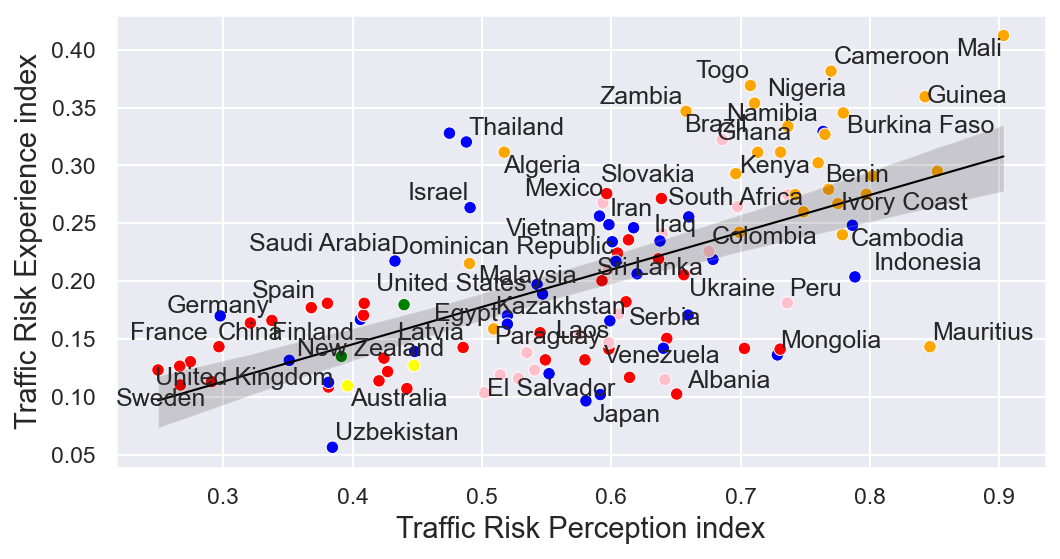

In [143]:
# List of countries to label
countries_to_label = ['United Kingdom','Malaysia','Albania','Mongolia','Macedonia','Zambia','Nigeria','Benin','Burkina Faso','Togo','Cameroon','Mali','Finland','Egypt','Latvia','Kazakhstan','Paraguay','United States','Germany','Spain','Afganistan','Thailan','Algeria','Peru','Indonesia','Serbia','Ukraine','Colombia','Uzbekistan','Guinea','Mali','Dominican Republic','Venezuela','Saudi Arabia','Namibia','Thailand','El Salvador','Paraguay','New Zealand','Australia','United States','China','Mexico','Israel','Slovakia','Vietnam','Iraq','Nigeria','Ghana','Namibia','Sri Lanka','Iran','Cambodia','Kenya','Ivory Coast','Brazil','South Africa','Togo','China','Mexico','Laos','Sweden','France','Japan','Mauritius']
#countries_to_label = merged_traffic.Country.unique()

# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# Apply the function to create the 'RegionCategory' column
merged_traffic['RegionCategory'] = merged_traffic['GlobalRegion'].apply(map_region_category)

sns.scatterplot(
    data=merged_traffic,
    x='Perception_index_traffic',
    y='experience_index_traffic',
    hue='RegionCategory',
    palette=color_palette
)
texts=[]
# Add country names as labels to the points
for i, row in merged_traffic.iterrows():
    if row['Country'] in countries_to_label:
        texts.append(plt.text(row['Perception_index_traffic'], row['experience_index_traffic'], row['Country'], fontsize=12))


# Add a regression line
sns.regplot(
    data=merged_traffic,
    x='Perception_index_traffic',
    y='experience_index_traffic',
    scatter=False,  # Set to False to avoid plotting data points again
    color='black',  # Set the color of the regression line
    line_kws={"linewidth": 1}  # Set the line width of the regression line
)

# Set x and y axis labels
plt.xlabel('Traffic Risk Perception index', fontsize=14)
plt.ylabel('Traffic Risk Experience index', fontsize=14)

adjust_text(texts, ax=ax,force_text=0.01)
#plt.legend(handles=legend_handles, loc='upper left', fontsize=14)  #bbox_to_anchor=(1.05, 1),
#plt.legend(loc='upper left', fontsize=12)  #bbox_to_anchor=(1.05, 1),
plt.legend('', frameon=False)

plt.savefig('./Figures/traffic_perception_experience.pdf',bbox_inches='tight')

# Display the plot
plt.show()

## Step 3.6. Traffic impact vs Actual

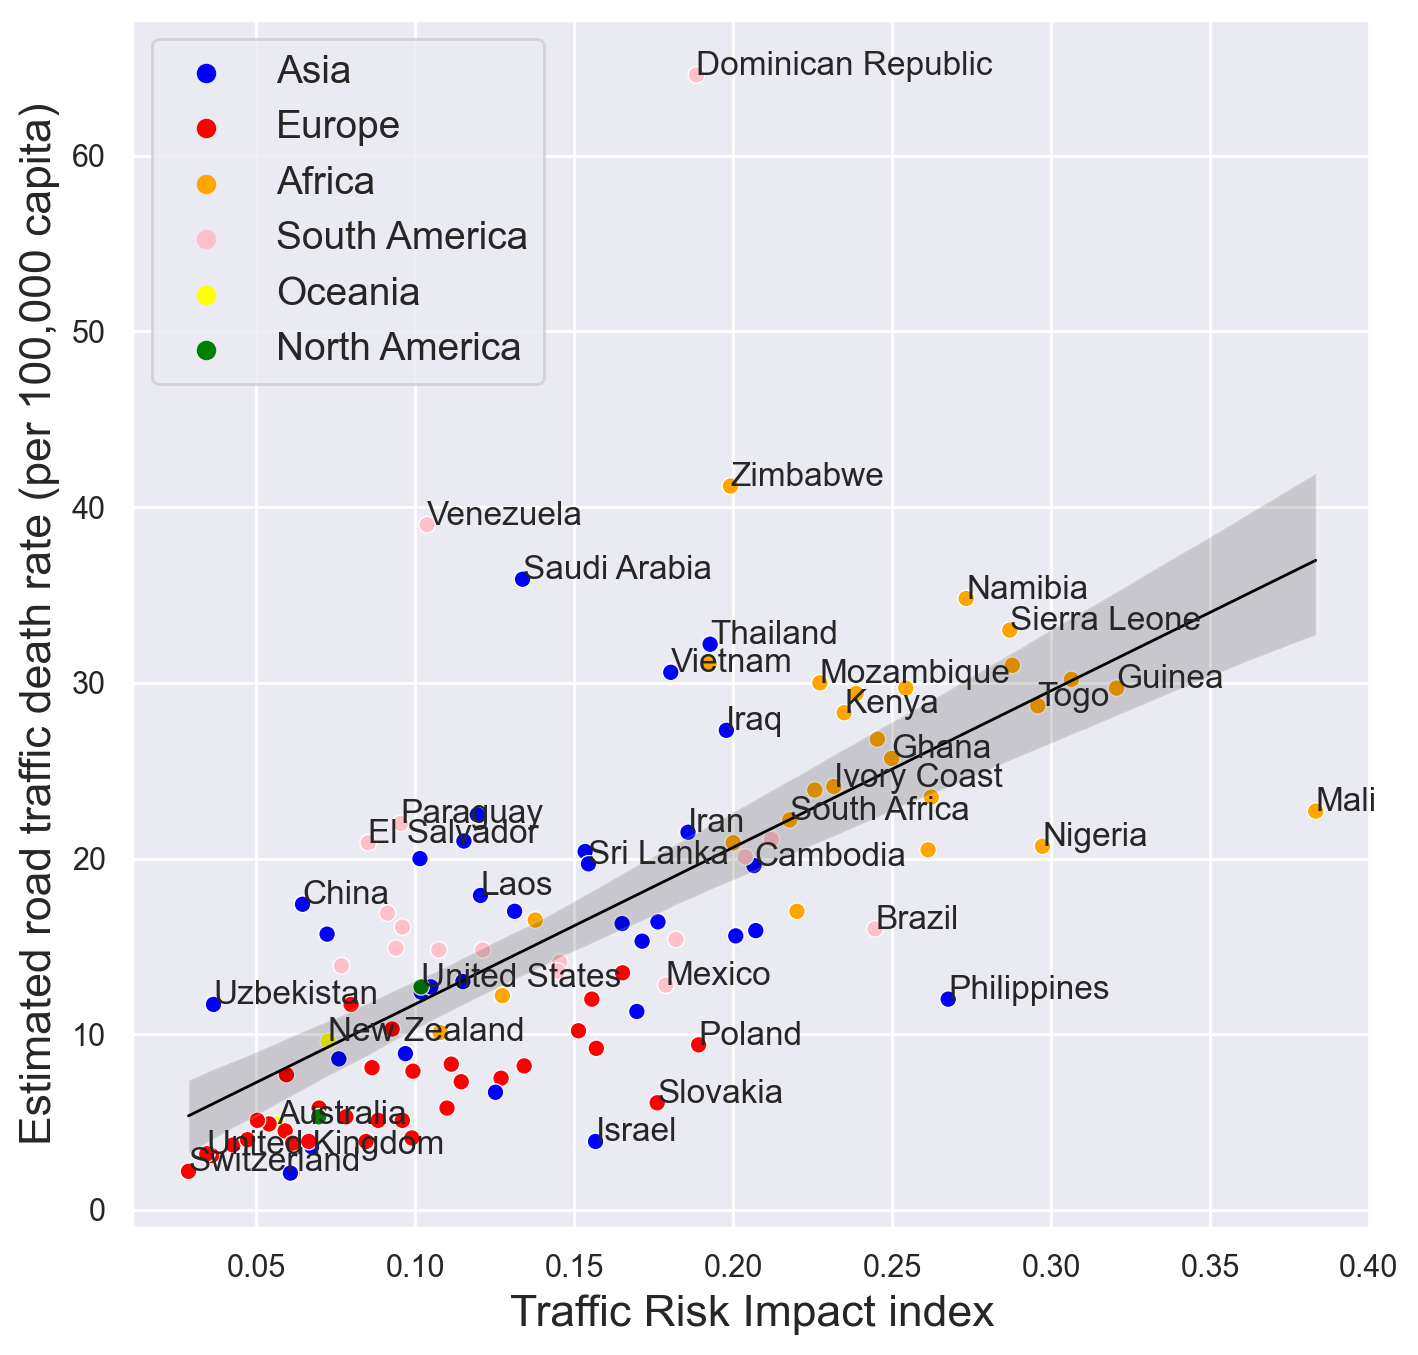

In [69]:
# List of countries to label
countries_to_label = ['Switzerland','United Kingdom','Uzbekistan','Guinea','Mali','Dominican Republic','Zimbabwe','Venezuela','Saudi Arabia','Namibia','Sierra Leone','Thailand','El Salvador','Paraguay','New Zealand','Australia','United States','China','Mexico','Philippines','Israel','Slovakia','Poland','Vietnam','Iraq','Nigeria','Ghana','Namibia','Sri Lanka','Iran','Cambodia','Kenya','Ivory Coast','Brazil','South Africa','Mozambique','Togo','China','Mexico','Laos']
#countries_to_label = merged_traffic.Country.unique()

# Create a scatter plot
plt.subplots(figsize=(8, 8), dpi=200)

# Apply the function to create the 'RegionCategory' column
merged_traffic['RegionCategory'] = merged_traffic['GlobalRegion'].apply(map_region_category)

sns.scatterplot(
    data=merged_traffic,
    x='risk_impact_index_traffic',
    y='Estimated road traffic death rate (per 100 000 population)',
    hue='RegionCategory',
    palette=color_palette
)

# Add country names as labels to the points
for i, row in merged_traffic.iterrows():
    if row['Country'] in countries_to_label:
        plt.text(row['risk_impact_index_traffic'], row['Estimated road traffic death rate (per 100 000 population)'], row['Country'], fontsize=12)


# Add a regression line
sns.regplot(
    data=merged_traffic,
    x='risk_impact_index_traffic',
    y='Estimated road traffic death rate (per 100 000 population)',
    scatter=False,  # Set to False to avoid plotting data points again
    color='black',  # Set the color of the regression line
    line_kws={"linewidth": 1}  # Set the line width of the regression line
)

# Set x and y axis labels
plt.xlabel('Traffic Risk Impact index', fontsize=16)
plt.ylabel('Estimated road traffic death rate (per 100,000 capita)', fontsize=16)

#plt.legend(handles=legend_handles, loc='upper left', fontsize=14)  #bbox_to_anchor=(1.05, 1),
plt.legend(loc='upper left', fontsize=14)  #bbox_to_anchor=(1.05, 1),

plt.savefig('./Figures/Risks_impact_vs_actual_traffic.pdf',bbox_inches='tight')

# Display the plot
plt.show()


## Step 3.7 Comparison with crime statistical data

In [70]:
df_crime = pd.read_csv("./shapefiles/crime.csv")
df_crime = df_crime.rename(columns={'country': 'Country'}) 
df_crime.head()

Country  crimeIndex
0         Venezuela       83.76
1  Papua New Guinea       80.79
2      South Africa       76.86
3       Afghanistan       76.31
4          Honduras       74.54

In [71]:
#rename the countries in statistical traffic data as Poll data survey
df_crime['Country'] = df_crime['Country'].replace('Bosnia And Herzegovina', 'Bosnia Herzegovina')
df_crime['Country'] = df_crime['Country'].replace('Papua New Guinea', 'Guinea')

In [72]:
merged_crime = df_crime.merge(index_scores, on='Country', how='inner')
merged_crime.head()

Country  crimeIndex  perception_index  experience_index  \
0     Venezuela       83.76          0.532048          0.161137   
1        Guinea       80.79          0.720953          0.246974   
2  South Africa       76.86          0.589946          0.191910   
3   Afghanistan       76.31          0.504098          0.350008   
4      Honduras       74.54          0.421881          0.116495   

   risk_impact_index  readiness_index  Perception_index_food  \
0           0.101761         0.492394               0.532000   
1           0.189689         0.492212               0.680303   
2           0.131190         0.342375               0.422696   
3           0.217335         0.341858               0.385155   
4           0.067771         0.583247               0.364286   

   Perception_index_water  Perception_index_crime  Perception_index_weather  \
0                0.582500                0.711924                  0.632000   
1                0.625755                0.723698                  0.774872   
2                0.457269                0.838077                  0.646707   
3                0.345190                0.736069                  0.549231   
4                0.278846                0.563572                  0.596386   

   ...  experience_index_work  risk_impact_index_food  \
0  ...               0.157250                0.095095   
1  ...               0.231814                0.164412   
2  ...               0.160820                0.100549   
3  ...               0.323498                0.186173   
4  ...               0.109909                0.054342   

   risk_impact_index_water  risk_impact_index_crime  \
0                 0.114375                 0.181112   
1                 0.125000                 0.182561   
2                 0.107601                 0.290675   
3                 0.175805                 0.356339   
4                 0.042219                 0.096193   

   risk_impact_index_weather  risk_impact_index_traffic  \
0                   0.187813                   0.103729   
1                   0.232458                   0.320624   
2                   0.136307                   0.217786   
3                   0.255847                   0.207132   
4                   0.197621                   0.095998   

   risk_impact_index_mental_health  risk_impact_index_work  \
0                         0.053428                0.088100   
1                         0.221373                0.203608   
2                         0.105020                0.111085   
3                         0.342541                0.152985   
4                         0.041925                0.055856   

                GlobalRegion  resilience_index  
0  Latin America & Caribbean          0.050106  
1     Central/Western Africa          0.093367  
2            Southern Africa          0.044916  
3                 South Asia          0.074298  
4  Latin America & Caribbean          0.039527  

[5 rows x 29 columns]

## Step 3.8 Crime perception vs Crime Experience

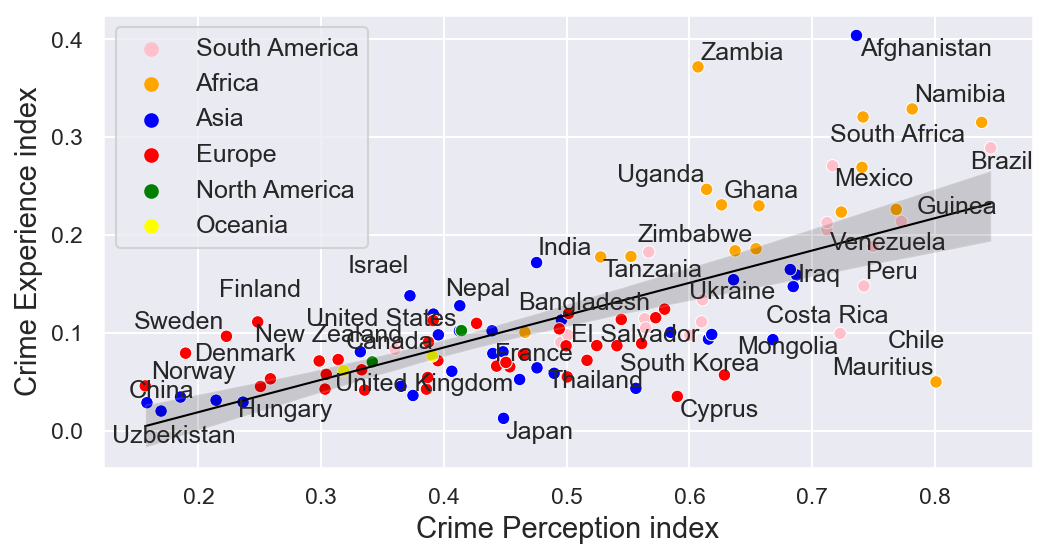

In [130]:

# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# Apply the function to create the 'RegionCategory' column
merged_crime['RegionCategory'] = merged_crime['GlobalRegion'].apply(map_region_category)

sns.scatterplot(
    data=merged_crime,
    x='Perception_index_crime',
    y='experience_index_crime',
    hue='RegionCategory',
    palette=color_palette
)

# Add a regression line
sns.regplot(
    data=merged_crime,
    x='Perception_index_crime',
    y='experience_index_crime',
    scatter=False,  # Set to False to avoid plotting data points again
    color='black',  # Set the color of the regression line
    line_kws={"linewidth": 1}  # Set the line width of the regression line
)

countries_to_label = ['United Kingdom','Guinea','Japan','Zimbabwe','Venezuela','Namibia','Thailand','France','New Zealand','United States','China','Mexico','Israel','Afghanistan','South Africa','Bangladesh','Zambia','Canada','Peru','China','Nepal','Iraq','India','Costa Rica','Mongolia','Hungary','El Salvador','Ghana','France','Finland','Sweden','Denmark','Norway','Israel','India','Afganistan','Mauritius','South Korea','Cyprus','Chile','Brazil','Tanzania','Ukraine','Uzbekistan','Uganda','Venezuela']

#countries_to_label = merged_crime.Country.unique()
# Add country names as labels to the points
texts=[]
for i, row in merged_crime.iterrows():
    if row['Country'] in countries_to_label:
        texts.append(plt.text(row['Perception_index_crime'], row['experience_index_crime'], row['Country'],  fontsize=12))

# Set x and y axis labels
plt.xlabel('Crime Perception index',fontsize=14)
plt.ylabel('Crime Experience index',fontsize=14)
adjust_text(texts, ax=ax,force_text=0.01)

# Move legend outside plot area
plt.legend(loc='upper left', fontsize=12)

# Display the plot

plt.savefig('./Figures/crime_experience_perception.pdf',bbox_inches='tight')
plt.show();

## Step 3.9 Crime impact vs actual

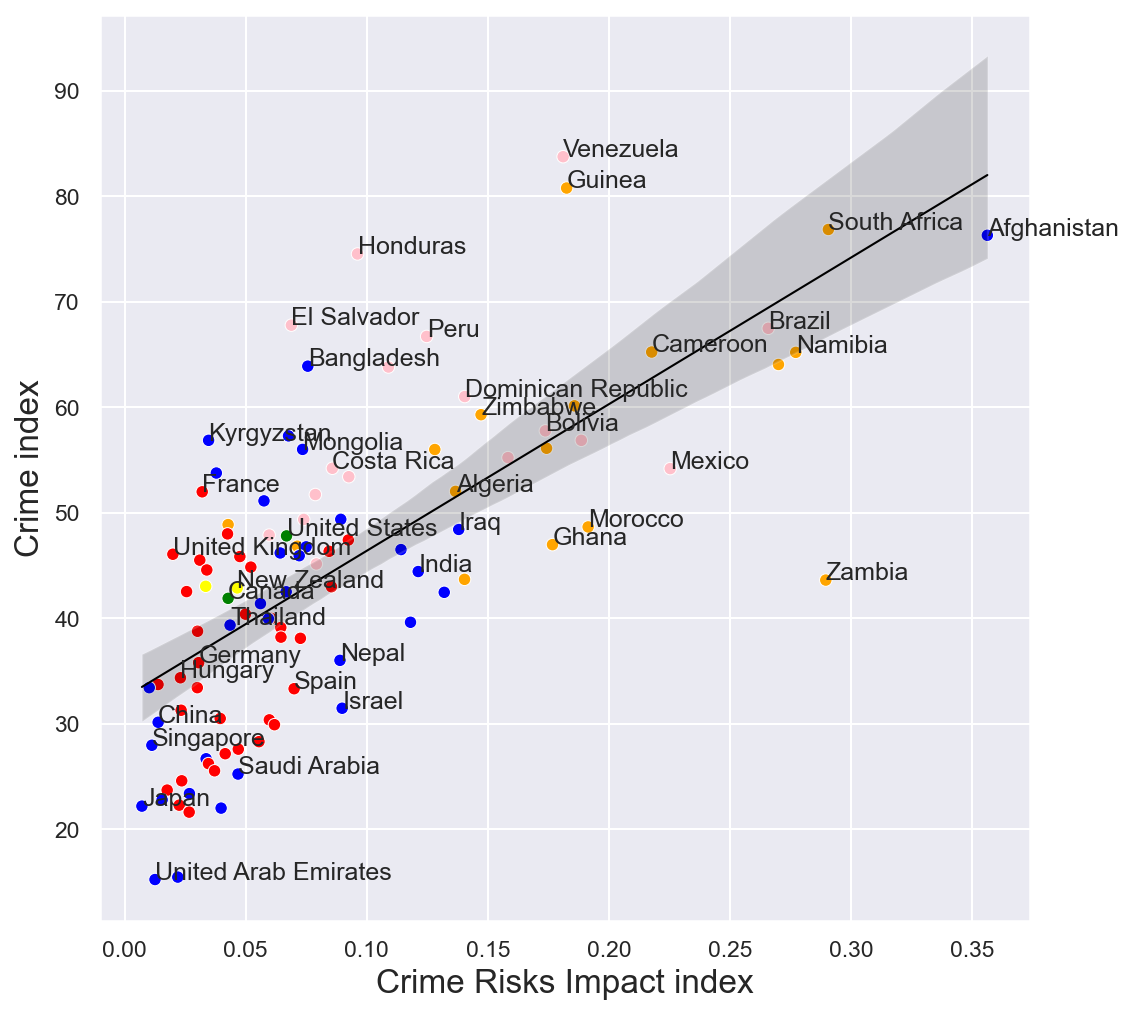

In [74]:
# List of countries to label
countries_to_label = ['United Kingdom','United Arab Emirates','Guinea','Japan','Dominican Republic','Zimbabwe','Venezuela','Saudi Arabia','Namibia','Singapore','Thailand','France','New Zealand','United States','China','Mexico','Honduras','Israel','Afghanistan','South Africa','Bangladesh','Zambia','Canada','Germany','Algeria','Morocco','Bolivia','Peru','China','Nepal','Brazil','Cameroon','Iraq','India','Costa Rica','Mongolia','Hungary','Spain','El Salvador','Kyrgyzstan','Ghana']
#countries_to_label = merged_traffic.Country.unique()

# Create a scatter plot
plt.subplots(figsize=(8, 8), dpi=150)

# Apply the function to create the 'RegionCategory' column
merged_traffic['RegionCategory'] = merged_crime['GlobalRegion'].apply(map_region_category)

g = sns.scatterplot(
    data=merged_crime,
    x='risk_impact_index_crime',
    y='crimeIndex',
    hue=merged_traffic['RegionCategory'],
    palette=color_palette
)

# Add a regression line
sns.regplot(
    data=merged_crime,
    x='risk_impact_index_crime',
    y='crimeIndex',
    scatter=False,  # Set to False to avoid plotting data points again
    color='black',  # Set the color of the regression line
    line_kws={"linewidth": 1}  # Set the line width of the regression line
)

# Add country names as labels to the points
for i, row in merged_crime.iterrows():
    if row['Country'] in countries_to_label:
        plt.text(row['risk_impact_index_crime'], row['crimeIndex'], row['Country'], fontsize=12)

# Set x and y axis labels
plt.xlabel('Crime Risks Impact index', fontsize = 16)
plt.ylabel('Crime index', fontsize=16)
g.get_legend().remove()

# Show all the categories in the legend
#legend_labels = ['Africa', 'North America','South America','Asia', 'Europe','Oceana']
#legend_handles = []
#for label in legend_labels:
#    handle = plt.Line2D([], [], color=color_palette[label], marker='o', markersize=5, label=label)
#    legend_handles.append(handle)

#plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
#plt.legend(  loc='lower right', fontsize=14)


plt.savefig('./Figures/Risks_impact_vs_actual_crime.pdf',bbox_inches='tight')

# Display the plot
plt.show()

## Step 3.10: Mental health and Serious Weather perception vs experience index

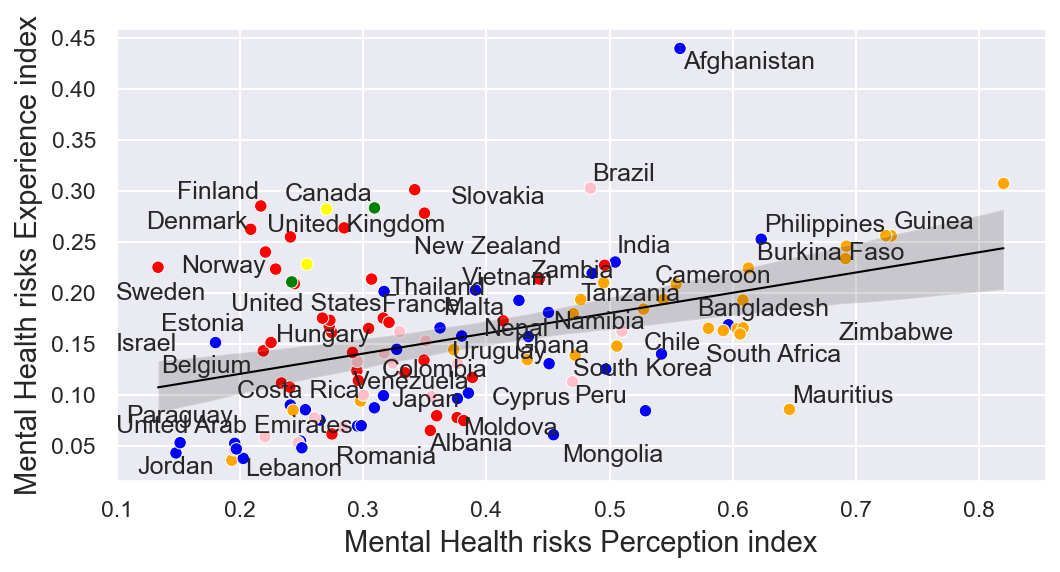

In [138]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# Apply the function to create the 'RegionCategory' column
index_scores['RegionCategory'] = index_scores['GlobalRegion'].apply(map_region_category)

sns.scatterplot(
    data=index_scores,
    x='Perception_index_mental_health',
    y='experience_index_mental_health',
    hue='RegionCategory',
    palette=color_palette
)

# Add a regression line
sns.regplot(
    data=index_scores,
    x='Perception_index_mental_health',
    y='experience_index_mental_health',
    scatter=False,  # Set to False to avoid plotting data points again
    color='black',  # Set the color of the regression line
    line_kws={"linewidth": 1}  # Set the line width of the regression line
)

countries_to_label = ['United Kingdom','Malta','Jordan','Lebanon','Romania','Paraguay','Burkina Faso','Vietnam','Cameroon','Uruguay','Estonia','Belgium','Philippines','Peru','Cyprus','Albania','Moldova','United Arab Emirates','Guinea','Japan','Zimbabwe','Venezuela','Namibia','Thailand','France','New Zealand','United States','Israel','Afghanistan','South Africa','Bangladesh','Zambia','Canada','Peru','Nepal','India','Costa Rica','Mongolia','Hungary','Ghana','France','Finland','Sweden','Denmark','Norway','Israel','India','Afganistan','Mauritius','South Korea','Cyprus','Chile','Brazil','Tanzania','Slovakia','Venezuela','Colombia']
#countries_to_label = merged_crime.Country.unique()
# Add country names as labels to the points
texts=[]
for i, row in index_scores.iterrows():
    if row['Country'] in countries_to_label:
        texts.append(plt.text(row['Perception_index_mental_health'], row['experience_index_mental_health'], row['Country'],  fontsize=12))

# Set x and y axis labels
plt.xlabel('Mental Health risks Perception index',fontsize=14)
plt.ylabel('Mental Health risks Experience index',fontsize=14)
adjust_text(texts, ax=ax,force_text=0.015)
# Move legend outside plot area
#plt.legend(loc='upper left', fontsize=12)
plt.legend('', frameon=False)

# Display the plot

plt.savefig('./Figures/mental_health_experience_perception.pdf',bbox_inches='tight')
plt.show();

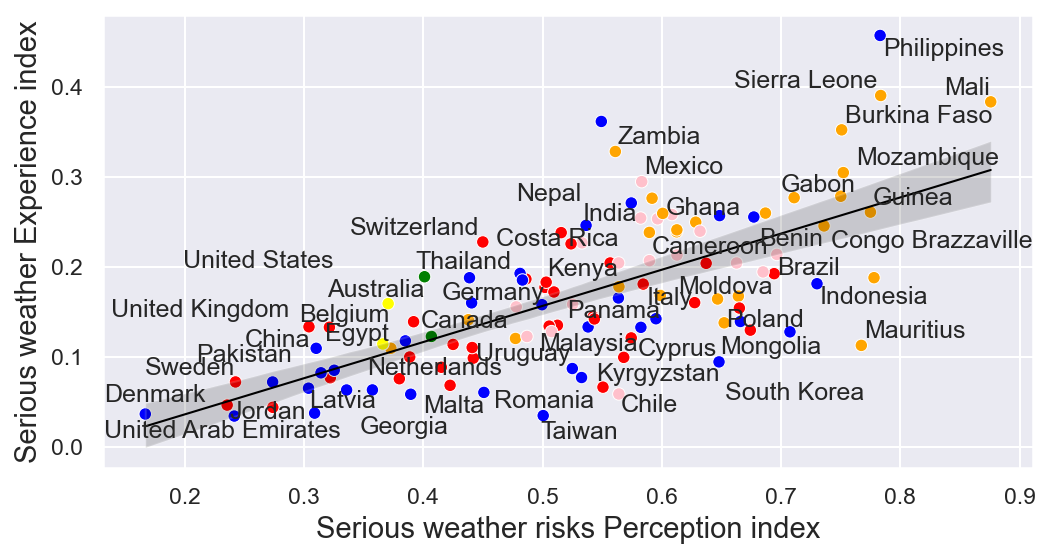

In [142]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# Apply the function to create the 'RegionCategory' column
#index_scores['RegionCategory'] = index_scores['GlobalRegion'].apply(map_region_category)

sns.scatterplot(
    data=index_scores,
    x='Perception_index_weather',
    y='experience_index_weather',
    hue='RegionCategory',
    palette=color_palette
)

# Add a regression line
sns.regplot(
    data=index_scores,
    x='Perception_index_weather',
    y='experience_index_weather',
    scatter=False,  # Set to False to avoid plotting data points again
    color='black',  # Set the color of the regression line
    line_kws={"linewidth": 1}  # Set the line width of the regression line
)

countries_to_label = ['United States','United Arab Emirates','Panama','Latvia','Thailand','Kenya','Cameroon','Ecuado','Denmark','Taiwan','Chile','Romania','Sweden','Pakistan','Malta','Georgia','Jordan','Netherlands','Cyprus','China','Egypt','United Kingdom','Belgium','Australia','Canada','South Korea','Mauritius','Uruguay','Malaysia','Poland','Kyrgyzstan','Mongolia','Italy','Panama','Sovenia','Germany','Philippines','Afganistan','Zambia','Mexico','India','Sierra Leone','Mali','Burkina Faso','Zambia','Mozambique','Gabon','Guinea','Congo Brazzaville','Nepal','Switzerland','Brazil','Moldova','Indonesia','Costa Rica','Ghana','Benin']
#countries_to_label = index_scores.Country.unique()
# Add country names as labels to the points
texts=[]
for i, row in index_scores.iterrows():
    if row['Country'] in countries_to_label:
        texts.append(plt.text(row['Perception_index_weather'], row['experience_index_weather'], row['Country'],  fontsize=12))

# Set x and y axis labels
plt.xlabel('Serious weather risks Perception index',fontsize=14)
plt.ylabel('Serious weather Experience index',fontsize=14)
adjust_text(texts, ax=ax,force_text=0.015)
# Move legend outside plot area
#plt.legend(loc='upper left', fontsize=14)
plt.legend('', frameon=False)
# Display the plot

plt.savefig('./Figures/weather_experience_perception.pdf',bbox_inches='tight')
plt.show();



## Make a heat map of Risk Impact index for Traffic and Crime

In [77]:
index_scores.head()

Country  perception_index  experience_index  risk_impact_index  \
0  Afghanistan          0.504098          0.350008           0.217335   
1      Albania          0.466912          0.066757           0.041336   
2      Algeria          0.417045          0.179415           0.086729   
3    Argentina          0.461948          0.152959           0.085949   
4      Armenia          0.322071          0.090433           0.039543   

   readiness_index  Perception_index_food  Perception_index_water  \
0         0.341858               0.385155                0.345190   
1         0.239796               0.556056                0.494494   
2         0.375000               0.310521                0.324695   
3         0.567368               0.413741                0.410410   
4         0.574682               0.456609                0.273092   

   Perception_index_crime  Perception_index_weather  Perception_index_traffic  \
0                0.736069                  0.549231                  0.474846   
1                0.385743                  0.415075                  0.650505   
2                0.637205                  0.477273                  0.517116   
3                0.610611                  0.533033                  0.597793   
4                0.236298                  0.357287                  0.405961   

   ...  risk_impact_index_food  risk_impact_index_water  \
0  ...                0.186173                 0.175805   
1  ...                0.059362                 0.039653   
2  ...                0.126156                 0.094584   
3  ...                0.053860                 0.081456   
4  ...                0.091223                 0.047980   

   risk_impact_index_crime  risk_impact_index_weather  \
0                 0.356339                   0.255847   
1                 0.025583                   0.062248   
2                 0.136694                   0.074395   
3                 0.108952                   0.161949   
4                 0.015479                   0.040265   

   risk_impact_index_traffic  risk_impact_index_mental_health  \
0                   0.207132                         0.342541   
1                   0.079833                         0.047734   
2                   0.200052                         0.049208   
3                   0.145457                         0.087212   
4                   0.101498                         0.052810   

   risk_impact_index_work               GlobalRegion  resilience_index  \
0                0.152985                 South Asia          0.074298   
1                0.027612            Southern Europe          0.009912   
2                0.084452               North Africa          0.032523   
3                0.067838  Latin America & Caribbean          0.048765   
4                0.033333               Central Asia          0.022725   

   RegionCategory  
0            Asia  
1          Europe  
2          Africa  
3   South America  
4            Asia  

[5 rows x 29 columns]

In [78]:
merged_first.head()

Country                                           geometry  \
0  Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1      Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...   
2      Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...   
3    Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...   
4      Armenia  MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...   

       globalregion_category  
0                 South Asia  
1            Southern Europe  
2               North Africa  
3  Latin America & Caribbean  
4               Central Asia

In [79]:
risk_index_merged = merged_first.merge(index_scores, on='Country', how='inner')
risk_index_merged.head()

Country                                           geometry  \
0  Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1      Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...   
2      Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...   
3    Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...   
4      Armenia  MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...   

       globalregion_category  perception_index  experience_index  \
0                 South Asia          0.504098          0.350008   
1            Southern Europe          0.466912          0.066757   
2               North Africa          0.417045          0.179415   
3  Latin America & Caribbean          0.461948          0.152959   
4               Central Asia          0.322071          0.090433   

   risk_impact_index  readiness_index  Perception_index_food  \
0           0.217335         0.341858               0.385155   
1           0.041336         0.239796               0.556056   
2           0.086729         0.375000               0.310521   
3           0.085949         0.567368               0.413741   
4           0.039543         0.574682               0.456609   

   Perception_index_water  Perception_index_crime  ...  \
0                0.345190                0.736069  ...   
1                0.494494                0.385743  ...   
2                0.324695                0.637205  ...   
3                0.410410                0.610611  ...   
4                0.273092                0.236298  ...   

   risk_impact_index_food  risk_impact_index_water  risk_impact_index_crime  \
0                0.186173                 0.175805                 0.356339   
1                0.059362                 0.039653                 0.025583   
2                0.126156                 0.094584                 0.136694   
3                0.053860                 0.081456                 0.108952   
4                0.091223                 0.047980                 0.015479   

   risk_impact_index_weather  risk_impact_index_traffic  \
0                   0.255847                   0.207132   
1                   0.062248                   0.079833   
2                   0.074395                   0.200052   
3                   0.161949                   0.145457   
4                   0.040265                   0.101498   

   risk_impact_index_mental_health  risk_impact_index_work  \
0                         0.342541                0.152985   
1                         0.047734                0.027612   
2                         0.049208                0.084452   
3                         0.087212                0.067838   
4                         0.052810                0.033333   

                GlobalRegion  resilience_index  RegionCategory  
0                 South Asia          0.074298            Asia  
1            Southern Europe          0.009912          Europe  
2               North Africa          0.032523          Africa  
3  Latin America & Caribbean          0.048765   South America  
4               Central Asia          0.022725            Asia  

[5 rows x 31 columns]

In [80]:
import matplotlib as mpl


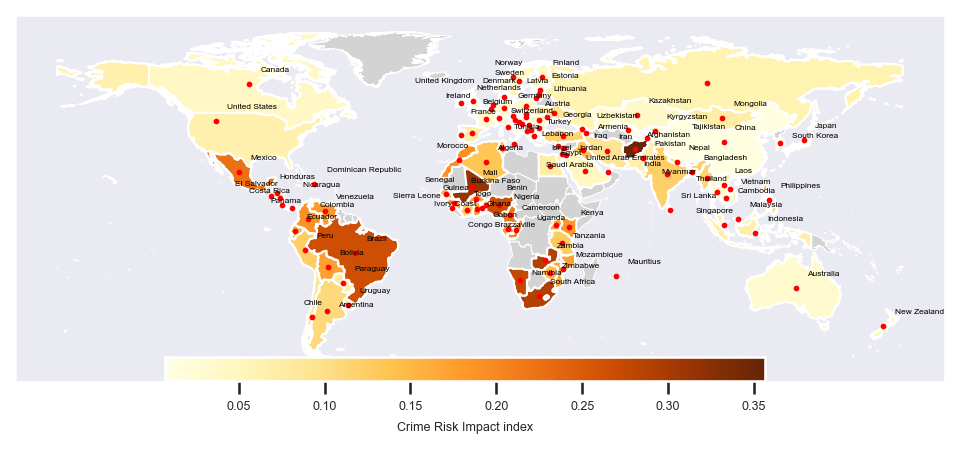

In [81]:
cmap = mpl.cm.YlOrBr
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Remove grids
ax.grid(False)

# Risk frequency
risk_plot = risk_index_merged.plot(ax=ax, column='risk_impact_index_crime', cmap=cmap, legend=False)

# Create a colorbar within the main graph and make it horizontal
norm = plt.Normalize(risk_index_merged['risk_impact_index_crime'].min(), risk_index_merged['risk_impact_index_crime'].max())
cbar_ax = fig.add_axes([0.25, 0.35, 0.5, 0.02])  # Adjust the position and size of the colorbar
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.ax.set_xlabel('Crime Risk Impact index',fontsize = 6)
cbar.ax.tick_params(labelsize=6)

# Add markers and store annotations in a list
texts = []
for idx, row in risk_index_merged.iterrows():
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    if (row['globalregion_category'] != 'Eastern Europe') &  (row['globalregion_category'] != 'Southern Europe') :
        texts.append(ax.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black'))

# Optimize annotation positions to minimize overlaps
adjust_text(texts, ax=ax,force_text=0.05)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
#plt.tight_layout()
plt.savefig('./Figures/risk_impact_crime_map.pdf')
# Show the plot
plt.show()

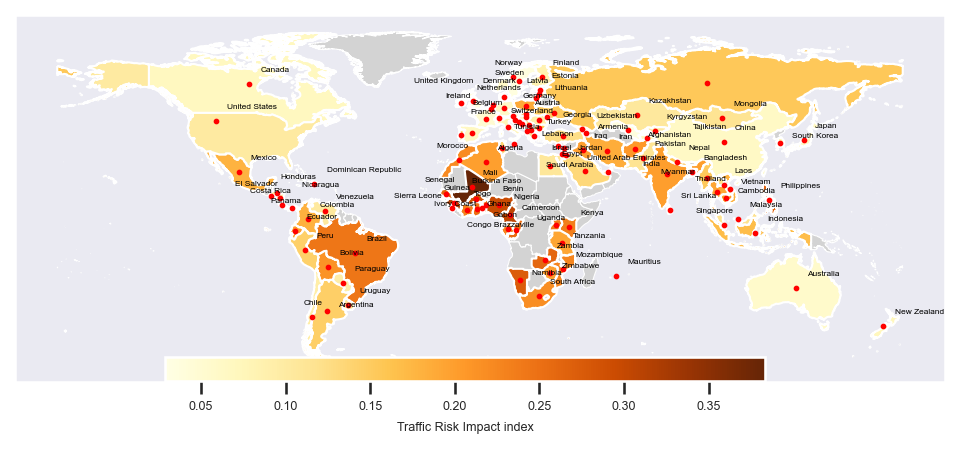

In [120]:
cmap = mpl.cm.YlOrBr
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Remove grids
ax.grid(False)

# Risk frequency
risk_plot = risk_index_merged.plot(ax=ax, column='risk_impact_index_traffic', cmap=cmap, legend=False)

# Create a colorbar within the main graph and make it horizontal
norm = plt.Normalize(risk_index_merged['risk_impact_index_traffic'].min(), risk_index_merged['risk_impact_index_traffic'].max())
cbar_ax = fig.add_axes([0.25, 0.35, 0.5, 0.02])  # Adjust the position and size of the colorbar
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.ax.set_xlabel('Traffic Risk Impact index',fontsize = 6)
cbar.ax.tick_params(labelsize=6)

# Add markers and store annotations in a list
texts = []
for idx, row in risk_index_merged.iterrows():
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    if (row['globalregion_category'] != 'Eastern Europe') &  (row['globalregion_category'] != 'Southern Europe') :
        texts.append(ax.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black'))

# Optimize annotation positions to minimize overlaps
adjust_text(texts, ax=ax,force_text=0.02)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
#plt.tight_layout()
plt.savefig('./Figures/risk_impact_traffic_map.pdf')
# Show the plot
plt.show()

# Step 4: Comparison of overall risk perception, impact and resilient index with population statistical data

In [83]:
df_pop = pd.read_csv("./shapefiles/population.csv")
df_pop.head()

Region, subregion, country or area *    Year Total Population (thousands)  \
0                                WORLD  1950.0                    2 499 322   
1                                WORLD  1951.0                    2 543 130   
2                                WORLD  1952.0                    2 590 271   
3                                WORLD  1953.0                    2 640 279   
4                                WORLD  1954.0                    2 691 979   

  Population Density (persons per square km)  
0                                       19.2  
1                                       19.5  
2                                       19.9  
3                                       20.2  
4                                       20.6

In [84]:
df_pop_2021 = df_pop[df_pop['Year'] == 2021]
df_pop_2021 = df_pop_2021.rename(columns={'Region, subregion, country or area *': 'Country'}) 
df_pop_2021 = df_pop_2021.drop(['Year','Total Population (thousands)'], axis=1)
df_pop_2021.head()

Country  \
71                              WORLD   
144                Sub-Saharan Africa   
216  Northern Africa and Western Asia   
288         Central and Southern Asia   
360    Eastern and South-Eastern Asia   

    Population Density (persons per square km)  
71                                        60.7  
144                                       52.0  
216                                       43.7  
288                                      199.9  
360                                      144.1

In [85]:
#converting into numeric values
df_pop_2021['Population Density (persons per square km)'] = pd.to_numeric(df_pop_2021['Population Density (persons per square km)'], errors='coerce')
df_pop_2021.head()

Country  \
71                              WORLD   
144                Sub-Saharan Africa   
216  Northern Africa and Western Asia   
288         Central and Southern Asia   
360    Eastern and South-Eastern Asia   

     Population Density (persons per square km)  
71                                         60.7  
144                                        52.0  
216                                        43.7  
288                                       199.9  
360                                       144.1

In [86]:
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Bosnia and Herzegovina', 'Bosnia Herzegovina')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Congo', 'Congo Brazzaville')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Czechia', 'Czech Republic')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Iran (Islamic Republic of)', 'Iran')
df_pop_2021['Country'] = df_pop_2021['Country'].replace("Côte d'Ivoire", 'Ivory Coast')
df_pop_2021['Country'] = df_pop_2021['Country'].replace("Lao People's Democratic Republic", 'Laos')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Republic of Moldova', 'Moldova')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Russian Federation', 'Russia')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Republic of Korea', 'South Korea')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('United Republic of Tanzania', 'Tanzania')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Türkiye', 'Turkey')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('United States of America', 'United States')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Viet Nam', 'Vietnam')

In [87]:
merged_pop = df_pop_2021.merge(index_scores, on='Country', how='inner')
merged_pop.head()

Country  Population Density (persons per square km)  perception_index  \
0       Kenya                                        91.3          0.550674   
1   Mauritius                                       639.9          0.598781   
2  Mozambique                                        40.8          0.704409   
3      Uganda                                       229.5          0.524804   
4    Tanzania                                        71.8          0.480851   

   experience_index  risk_impact_index  readiness_index  \
0          0.225890           0.147029         0.450754   
1          0.090805           0.061365         0.804954   
2          0.259018           0.198115         0.596070   
3          0.242063           0.144261         0.439716   
4          0.168458           0.097924         0.507708   

   Perception_index_food  Perception_index_water  Perception_index_crime  \
0               0.486500                0.449651                0.656627   
1               0.403749                0.257360                0.800916   
2               0.720226                0.593909                0.681967   
3               0.409228                0.404810                0.613956   
4               0.243927                0.381168                0.527692   

   Perception_index_weather  ...  risk_impact_index_food  \
0                  0.564000  ...                0.135870   
1                  0.767241  ...                0.045256   
2                  0.752160  ...                0.238552   
3                  0.612563  ...                0.120599   
4                  0.598684  ...                0.041667   

   risk_impact_index_water  risk_impact_index_crime  \
0                 0.149448                 0.185790   
1                 0.019750                 0.042733   
2                 0.176579                 0.172565   
3                 0.137814                 0.174269   
4                 0.105183                 0.128106   

   risk_impact_index_weather  risk_impact_index_traffic  \
0                   0.135617                   0.234944   
1                   0.096713                   0.127411   
2                   0.263672                   0.227298   
3                   0.189451                   0.238705   
4                   0.131994                   0.192464   

   risk_impact_index_mental_health  risk_impact_index_work    GlobalRegion  \
0                         0.129289                0.166845  Eastern Africa   
1                         0.066259                0.072767  Eastern Africa   
2                         0.213913                0.213046  Eastern Africa   
3                         0.112206                0.145592  Eastern Africa   
4                         0.135093                0.079215  Eastern Africa   

   resilience_index  RegionCategory  
0          0.066274          Africa  
1          0.049396          Africa  
2          0.118090          Africa  
3          0.063434          Africa  
4          0.049717          Africa  

[5 rows x 30 columns]

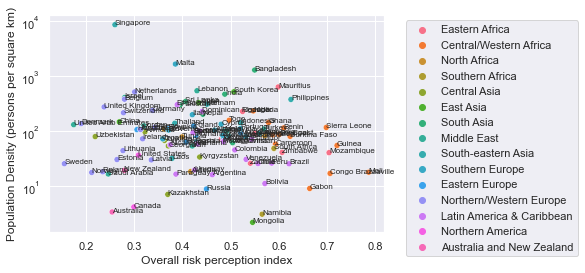

In [88]:
# Create a scatter plot
sns.scatterplot(data=merged_pop, x='perception_index', y='Population Density (persons per square km)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_pop.iterrows():
    plt.text(row['perception_index'], row['Population Density (persons per square km)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('Overall risk perception index')
plt.ylabel('Population Density (persons per square km)')
# set y-axis to log scale
plt.yscale('log') 

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

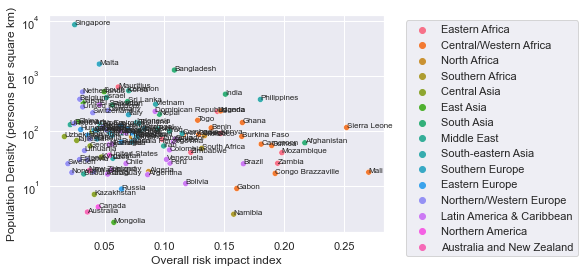

In [89]:
# Create a scatter plot
sns.scatterplot(data=merged_pop, x='risk_impact_index', y='Population Density (persons per square km)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_pop.iterrows():
    plt.text(row['risk_impact_index'], row['Population Density (persons per square km)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('Overall risk impact index')
plt.ylabel('Population Density (persons per square km)')
# set y-axis to log scale
plt.yscale('log') 

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

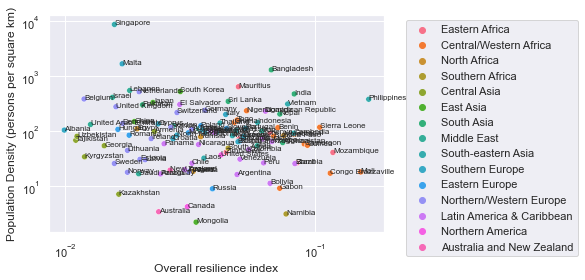

In [90]:
# Create a scatter plot
sns.scatterplot(data=merged_pop, x='resilience_index', y='Population Density (persons per square km)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_pop.iterrows():
    plt.text(row['resilience_index'], row['Population Density (persons per square km)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('Overall resilience index')
plt.ylabel('Population Density (persons per square km)')
# set y-axis to log scale
plt.yscale('log') 
plt.xscale('log') 
# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

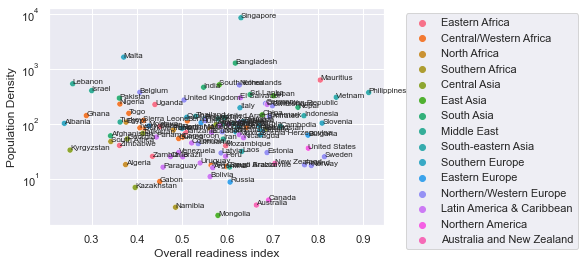

In [91]:
#Graph for the readyness
# Create a scatter plot
sns.scatterplot(data=merged_pop, x='readiness_index', y='Population Density (persons per square km)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_pop.iterrows():
    plt.text(row['readiness_index'], row['Population Density (persons per square km)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('Overall readiness index')
plt.ylabel('Population Density')
# set y-axis to log scale
plt.yscale('log') 

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

## New Resilience index


### Comparison between New Resilience Index vs Risk Impact Index

New_resilience(for country, for individual) = Average of all individual respond to Q20(individual), Q21, Q12 and Q16C (household), Q13 and Q16D(community), and Q16A and Q16B (society)

In [92]:
index_resi=df.loc[:, ['GlobalRegion','Country', 'Q20', 'Q21','Q10Q11Recode','Q16C', 'Q13','Q16D','Q16A','Q16B']]
index_resi.head()

GlobalRegion        Country  Q20  Q21  Q10Q11Recode  Q16C  Q13  Q16D  Q16A  \
0             6  United States  1.0  1.0           6.0   1.0  1.0   2.0   2.0   
1             6  United States  1.0  1.0           6.0   1.0  1.0   1.0   2.0   
2             6  United States  1.0  1.0           8.0   1.0  2.0   1.0   1.0   
3             6  United States  1.0  2.0           5.0   1.0  1.0   1.0   2.0   
4             6  United States  1.0  1.0           8.0   1.0  2.0   1.0   1.0   

   Q16B  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0

In [93]:
cols_to_replace = ['Q20', 'Q21','Q10Q11Recode','Q16C', 'Q13','Q16D','Q16A','Q16B']
replace_dict = {98: np.nan, 99: np.nan}
index_resi[cols_to_replace] = index_resi[cols_to_replace].replace(replace_dict)
index_resi.head()

GlobalRegion        Country  Q20  Q21  Q10Q11Recode  Q16C  Q13  Q16D  Q16A  \
0             6  United States  1.0  1.0           6.0   1.0  1.0   2.0   2.0   
1             6  United States  1.0  1.0           6.0   1.0  1.0   1.0   2.0   
2             6  United States  1.0  1.0           8.0   1.0  2.0   1.0   1.0   
3             6  United States  1.0  2.0           5.0   1.0  1.0   1.0   2.0   
4             6  United States  1.0  1.0           8.0   1.0  2.0   1.0   1.0   

   Q16B  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0

In [94]:
# replace the values 2 with 0.5 and 3 with 0
index_resi.loc[:, ['Q13']] = index_resi.loc[:, ['Q13']].replace({2: 0.5, 3: 0})
index_resi.loc[:, ['Q10Q11Recode']] = index_resi.loc[:, ['Q10Q11Recode']].replace({1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4, 5: 0.5, 6: 0.8, 7: 0.9, 8: 1, 9: 0.7})
index_resi.loc[:, ['Q20','Q16D','Q16A','Q16B','Q16C']] = index_resi.loc[:, ['Q20','Q16D','Q16A','Q16B','Q16C']].replace({3: 0.5, 2: 0})
index_resi.loc[:, ['Q21']] = index_resi.loc[:, ['Q21']].replace({2: 0})
index_resi.head()

GlobalRegion        Country  Q20  Q21  Q10Q11Recode  Q16C  Q13  Q16D  Q16A  \
0             6  United States  1.0  1.0           0.8   1.0  1.0   0.0   0.0   
1             6  United States  1.0  1.0           0.8   1.0  1.0   1.0   0.0   
2             6  United States  1.0  1.0           1.0   1.0  0.5   1.0   1.0   
3             6  United States  1.0  0.0           0.5   1.0  1.0   1.0   0.0   
4             6  United States  1.0  1.0           1.0   1.0  0.5   1.0   1.0   

   Q16B  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0

In [95]:
# define a function to compute the average of the non-ignored values in each row for perception score (worry) and experience score)
def compute_average(row):
    valid_values = [value for value in row if not pd.isna(value)]
    if len(valid_values) > 0:
        return np.mean(valid_values)
    else:
        return np.nan

# create a new column with the computed average
# index['individual_score'] = index.loc[:, []].apply(compute_average, axis=1)
index_resi['household_score'] = index_resi.loc[:, ['Q21','Q10Q11Recode','Q16C']].apply(compute_average, axis=1)
index_resi['community_score'] = index_resi.loc[:, ['Q13', 'Q16D']].apply(compute_average, axis=1)
index_resi['society_score'] = index_resi.loc[:, ['Q16A','Q16B']].apply(compute_average, axis=1)
index_resi.head()

GlobalRegion        Country  Q20  Q21  Q10Q11Recode  Q16C  Q13  Q16D  Q16A  \
0             6  United States  1.0  1.0           0.8   1.0  1.0   0.0   0.0   
1             6  United States  1.0  1.0           0.8   1.0  1.0   1.0   0.0   
2             6  United States  1.0  1.0           1.0   1.0  0.5   1.0   1.0   
3             6  United States  1.0  0.0           0.5   1.0  1.0   1.0   0.0   
4             6  United States  1.0  1.0           1.0   1.0  0.5   1.0   1.0   

   Q16B  household_score  community_score  society_score  
0   1.0         0.933333             0.50            0.5  
1   1.0         0.933333             1.00            0.5  
2   1.0         1.000000             0.75            1.0  
3   1.0         0.500000             1.00            0.5  
4   1.0         1.000000             0.75            1.0

In [96]:
# Calculating individual resilience score
index_resi['resilience_score'] = index_resi.loc[:, ['Q20','household_score','community_score','society_score']].apply(compute_average, axis=1)
index_resi.head()

GlobalRegion        Country  Q20  Q21  Q10Q11Recode  Q16C  Q13  Q16D  Q16A  \
0             6  United States  1.0  1.0           0.8   1.0  1.0   0.0   0.0   
1             6  United States  1.0  1.0           0.8   1.0  1.0   1.0   0.0   
2             6  United States  1.0  1.0           1.0   1.0  0.5   1.0   1.0   
3             6  United States  1.0  0.0           0.5   1.0  1.0   1.0   0.0   
4             6  United States  1.0  1.0           1.0   1.0  0.5   1.0   1.0   

   Q16B  household_score  community_score  society_score  resilience_score  
0   1.0         0.933333             0.50            0.5          0.733333  
1   1.0         0.933333             1.00            0.5          0.858333  
2   1.0         1.000000             0.75            1.0          0.937500  
3   1.0         0.500000             1.00            0.5          0.750000  
4   1.0         1.000000             0.75            1.0          0.937500

In [97]:
resilience_index = index_resi.groupby('Country').agg({'resilience_score': 'mean'}).reset_index()
resilience_index = resilience_index.rename(columns={'resilience_score': 'resilience_index'})
resilience_index.head()

Country  resilience_index
0  Afghanistan          0.286347
1      Albania          0.300214
2      Algeria          0.376750
3    Argentina          0.403610
4      Armenia          0.445351

In [98]:
index_scores.head()

Country  perception_index  experience_index  risk_impact_index  \
0  Afghanistan          0.504098          0.350008           0.217335   
1      Albania          0.466912          0.066757           0.041336   
2      Algeria          0.417045          0.179415           0.086729   
3    Argentina          0.461948          0.152959           0.085949   
4      Armenia          0.322071          0.090433           0.039543   

   readiness_index  Perception_index_food  Perception_index_water  \
0         0.341858               0.385155                0.345190   
1         0.239796               0.556056                0.494494   
2         0.375000               0.310521                0.324695   
3         0.567368               0.413741                0.410410   
4         0.574682               0.456609                0.273092   

   Perception_index_crime  Perception_index_weather  Perception_index_traffic  \
0                0.736069                  0.549231                  0.474846   
1                0.385743                  0.415075                  0.650505   
2                0.637205                  0.477273                  0.517116   
3                0.610611                  0.533033                  0.597793   
4                0.236298                  0.357287                  0.405961   

   ...  risk_impact_index_food  risk_impact_index_water  \
0  ...                0.186173                 0.175805   
1  ...                0.059362                 0.039653   
2  ...                0.126156                 0.094584   
3  ...                0.053860                 0.081456   
4  ...                0.091223                 0.047980   

   risk_impact_index_crime  risk_impact_index_weather  \
0                 0.356339                   0.255847   
1                 0.025583                   0.062248   
2                 0.136694                   0.074395   
3                 0.108952                   0.161949   
4                 0.015479                   0.040265   

   risk_impact_index_traffic  risk_impact_index_mental_health  \
0                   0.207132                         0.342541   
1                   0.079833                         0.047734   
2                   0.200052                         0.049208   
3                   0.145457                         0.087212   
4                   0.101498                         0.052810   

   risk_impact_index_work               GlobalRegion  resilience_index  \
0                0.152985                 South Asia          0.074298   
1                0.027612            Southern Europe          0.009912   
2                0.084452               North Africa          0.032523   
3                0.067838  Latin America & Caribbean          0.048765   
4                0.033333               Central Asia          0.022725   

   RegionCategory  
0            Asia  
1          Europe  
2          Africa  
3   South America  
4            Asia  

[5 rows x 29 columns]

In [99]:
index_scores=index_scores.drop('resilience_index',axis=1)

In [100]:
merged_index = resilience_index.merge(index_scores, on='Country', how='inner')
merged_index.head()

Country  resilience_index  perception_index  experience_index  \
0  Afghanistan          0.286347          0.504098          0.350008   
1      Albania          0.300214          0.466912          0.066757   
2      Algeria          0.376750          0.417045          0.179415   
3    Argentina          0.403610          0.461948          0.152959   
4      Armenia          0.445351          0.322071          0.090433   

   risk_impact_index  readiness_index  Perception_index_food  \
0           0.217335         0.341858               0.385155   
1           0.041336         0.239796               0.556056   
2           0.086729         0.375000               0.310521   
3           0.085949         0.567368               0.413741   
4           0.039543         0.574682               0.456609   

   Perception_index_water  Perception_index_crime  Perception_index_weather  \
0                0.345190                0.736069                  0.549231   
1                0.494494                0.385743                  0.415075   
2                0.324695                0.637205                  0.477273   
3                0.410410                0.610611                  0.533033   
4                0.273092                0.236298                  0.357287   

   ...  experience_index_work  risk_impact_index_food  \
0  ...               0.323498                0.186173   
1  ...               0.042169                0.059362   
2  ...               0.123457                0.126156   
3  ...               0.141109                0.053860   
4  ...               0.061235                0.091223   

   risk_impact_index_water  risk_impact_index_crime  \
0                 0.175805                 0.356339   
1                 0.039653                 0.025583   
2                 0.094584                 0.136694   
3                 0.081456                 0.108952   
4                 0.047980                 0.015479   

   risk_impact_index_weather  risk_impact_index_traffic  \
0                   0.255847                   0.207132   
1                   0.062248                   0.079833   
2                   0.074395                   0.200052   
3                   0.161949                   0.145457   
4                   0.040265                   0.101498   

   risk_impact_index_mental_health  risk_impact_index_work  \
0                         0.342541                0.152985   
1                         0.047734                0.027612   
2                         0.049208                0.084452   
3                         0.087212                0.067838   
4                         0.052810                0.033333   

                GlobalRegion  RegionCategory  
0                 South Asia            Asia  
1            Southern Europe          Europe  
2               North Africa          Africa  
3  Latin America & Caribbean   South America  
4               Central Asia            Asia  

[5 rows x 29 columns]

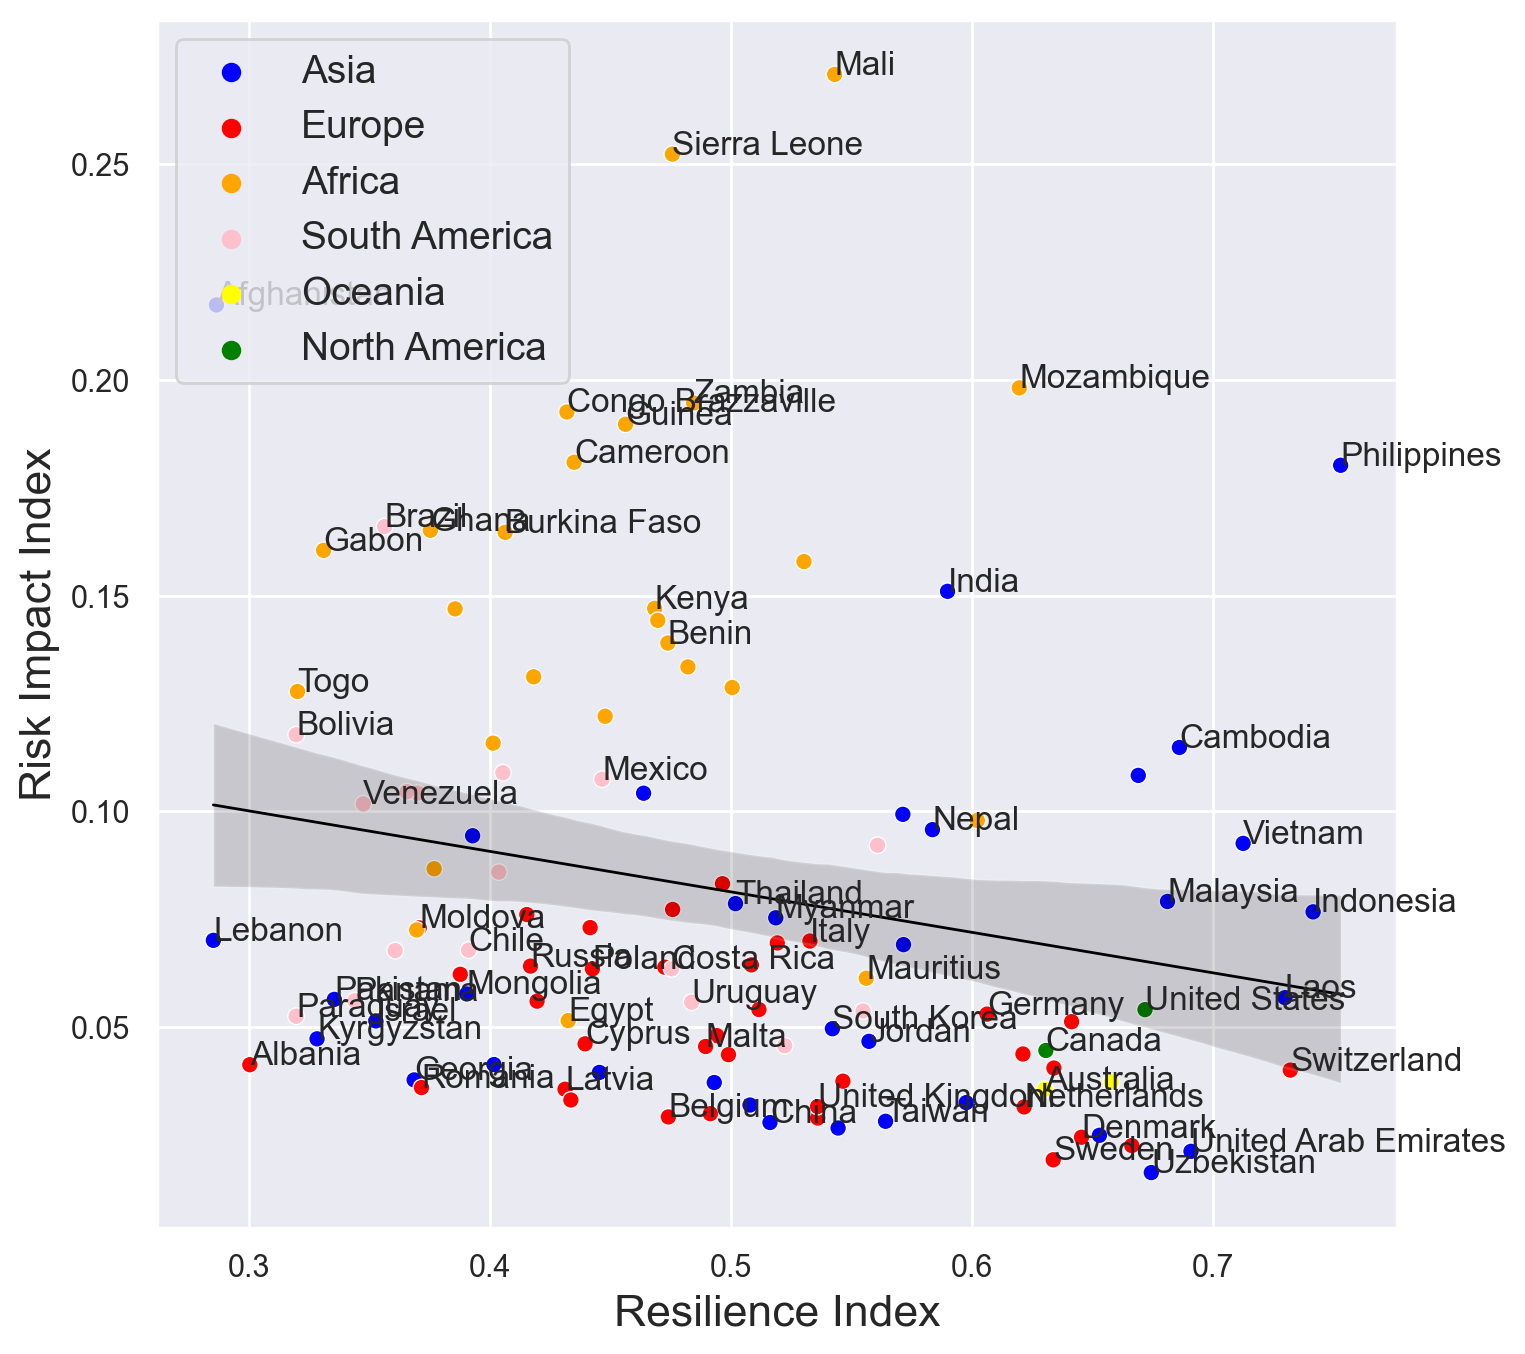

In [101]:
# Create a scatter plot
plt.subplots(figsize=(8, 8), dpi=200)

# Apply the function to create the 'RegionCategory' column
merged_index['RegionCategory'] = merged_index['GlobalRegion'].apply(map_region_category)

sns.scatterplot(
    data=merged_index,
    x='resilience_index',
    y='risk_impact_index',
    hue='RegionCategory',
    palette=color_palette
)

# Add a regression line
sns.regplot(
    data=merged_index,
    x='resilience_index',
    y='risk_impact_index',
    scatter=False,  # Set to False to avoid plotting data points again
    color='black',  # Set the color of the regression line
    line_kws={"linewidth": 1}  # Set the line width of the regression line
)

countries_to_label = ['United States','United Arab Emirates','Albania','Panama','Latvia','Thailand','Kenya','Cameroon','Ecuado','Denmark','Taiwan','Chile','Romania','Sweden','Pakistan','Malta','Georgia','Jordan','Netherlands','Cyprus','China','Egypt','United Kingdom','Belgium','Australia','Canada','South Korea','Mauritius','Uruguay','Russia','Myanmar','Malaysia','Poland','Kyrgyzstan','Mongolia','Italy','Panama','Sovenia','Germany','Philippines','Afganistan','Zambia','Mexico','India','Sierra Leone','Mali','Burkina Faso','Zambia','Mozambique','Gabon','Guinea','Congo Brazzaville','Nepal','Switzerland','Brazil','Moldova','Indonesia','Costa Rica','Ghana','Benin','Afghanistan','Albania','Lebanon','Paraguay','Bolivia','Israel','Kyrgyzstan','Panama','Togo','Venezuela','Vietnam','Laos','Cambodia','Malaysia','Uzbekistan']
#countries_to_label = index_scores.Country.unique()
# Add country names as labels to the points
for i, row in merged_index.iterrows():
    if row['Country'] in countries_to_label:
        plt.text(row['resilience_index'], row['risk_impact_index'], row['Country'],  fontsize=12)

# Set x and y axis labels
plt.xlabel('Resilience Index',fontsize=16)
plt.ylabel('Risk Impact Index',fontsize=16)

# Move legend outside plot area
plt.legend(loc='upper left', fontsize=14)

# Display the plot

plt.savefig('new resilience index vs risk impact.pdf',bbox_inches='tight')
plt.show();

In [102]:
merged_index[merged_index['resilience_index']>0.65]

Country  resilience_index  perception_index  \
7              Bangladesh          0.669111          0.549897   
15               Cambodia          0.686195          0.559931   
43              Indonesia          0.741710          0.520312   
56                   Laos          0.730007          0.378373   
60               Malaysia          0.681243          0.487752   
73            New Zealand          0.657860          0.279356   
77                 Norway          0.666422          0.211513   
82            Philippines          0.753132          0.625205   
91              Singapore          0.652978          0.259689   
99            Switzerland          0.732229          0.277450   
109  United Arab Emirates          0.690991          0.174034   
111         United States          0.671902          0.308489   
113            Uzbekistan          0.674516          0.218663   
115               Vietnam          0.712650          0.451059   

     experience_index  risk_impact_index  readiness_index  \
7            0.164906           0.108355         0.617363   
15           0.180111           0.114825         0.716981   
43           0.132280           0.076742         0.768744   
56           0.119874           0.056866         0.631823   
60           0.137288           0.079151         0.612193   
73           0.100482           0.037319         0.704661   
77           0.079543           0.022601         0.785132   
82           0.264887           0.180194         0.911824   
91           0.072018           0.024985         0.629727   
99           0.141517           0.040082         0.699161   
109          0.066737           0.021267         0.593326   
111          0.121286           0.054086         0.778443   
113          0.043214           0.016341         0.681667   
115          0.170166           0.092604         0.840081   

     Perception_index_food  Perception_index_water  Perception_index_crime  \
7                 0.535897                0.350709                0.495699   
15                0.641206                0.402414                0.412616   
43                0.322243                0.208136                0.618147   
56                0.346074                0.245902                0.330189   
60                0.391457                0.374122                0.584677   
73                0.134500                0.145646                0.390500   
77                0.170170                0.080160                0.156657   
82                0.593093                0.369739                0.682182   
91                0.251000                0.156344                0.214357   
99                0.276500                0.188188                0.313814   
109               0.168495                0.110558                0.158026   
111               0.230846                0.200995                0.414257   
113               0.125752                0.172189                0.169534   
115               0.548259                0.373380                0.439182   

     Perception_index_weather  ...  experience_index_work  \
7                    0.648374  ...               0.167903   
15                   0.677094  ...               0.193044   
43                   0.730076  ...               0.165722   
56                   0.499482  ...               0.134458   
60                   0.595046  ...               0.145960   
73                   0.366000  ...               0.088516   
77                   0.273774  ...               0.071750   
82                   0.783000  ...               0.208750   
91                   0.241466  ...               0.080339   
99                   0.449850  ...               0.205455   
109                  0.166833  ...               0.086653   
111                  0.400995  ...               0.084328   
113                  0.308824  ...               0.078125   
115                  0.483085  ...               0.215319   

     risk_impact_index_food  risk_impac

## Peolple experience on natural disasters and country's resilience to disasters

### Experience with Disasters

In [103]:
disaster_ex=df.loc[:, ['GlobalRegion','Country', 'Q18_1','Q17']]
disaster_ex.head()

GlobalRegion        Country  Q18_1  Q17
0             6  United States    NaN  2.0
1             6  United States    NaN  2.0
2             6  United States    NaN  2.0
3             6  United States    NaN  2.0
4             6  United States    NaN  2.0

In [104]:
disaster_ex = disaster_ex[(disaster_ex['Q18_1'] != 98) & (disaster_ex['Q18_1'] != 99)]


In [105]:
disaster_map = {
    1: 'Flood/Heavy rain',
    2: 'Hurricane/Cyclone',
    3: 'Tornado',
    4: 'Thunder or lightning storm',
    5: 'Tsunami',
    6: 'Mudslide',
    7: 'Earthquake',
    8: 'Wildfire',
    9: 'Volcano eruption',
    10: 'Blizzard or snowstorm',
    11: 'Other',
    50: 'Drought',
}

# Use the replace method to replace the numbers with the region names
disaster_ex['Q18_1'] = disaster_ex['Q18_1'].replace(disaster_map)
disaster_ex.head()

GlobalRegion        Country Q18_1  Q17
0             6  United States   NaN  2.0
1             6  United States   NaN  2.0
2             6  United States   NaN  2.0
3             6  United States   NaN  2.0
4             6  United States   NaN  2.0

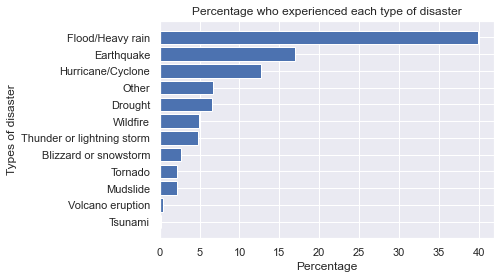

In [106]:
# Group the data by 'Q18_1' and count the occurrences
q18_1_counts = disaster_ex['Q18_1'].value_counts()

# Sort the counts in descending order
q18_1_counts = q18_1_counts.sort_values(ascending=True)

# Calculate the percentage for each type of disaster
total = q18_1_counts.sum()
q18_1_percentages = (q18_1_counts / total) * 100

# Sort the percentages in descending order
q18_1_percentages = q18_1_percentages.sort_values(ascending=True)

# Create a horizontal bar plot
plt.barh(q18_1_percentages.index, q18_1_percentages.values)

# Set the labels and title
plt.xlabel('Percentage')
plt.ylabel('Types of disaster')
plt.title('Percentage who experienced each type of disaster')


plt.savefig('./Figures/Disaster_experience.pdf')

# Display the plot
plt.show()


#### Comparison with disaster statistical data

##### people experience disaster in past 5 yrs vs actual data

In [107]:
df_disaster = pd.read_csv("./shapefiles/disasters.csv")
df_disaster = df_disaster.rename(columns={'Country name': 'Country'}) 
df_disaster.head()

Country  Year  Death rates from disasters  \
0  Afghanistan  1900                         0.0   
1  Afghanistan  1910                         0.0   
2  Afghanistan  1920                         0.0   
3  Afghanistan  1930                         0.0   
4  Afghanistan  1940                         0.0   

   Number of people affected by disasters per 100,000  
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0

In [108]:
df_disaster= df_disaster[df_disaster['Year'].isin([2020])]
df_disaster.head()

Country  Year  Death rates from disasters  \
12     Afghanistan  2020                    1.700606   
25          Africa  2020                    0.156916   
38         Albania  2020                    0.000000   
51         Algeria  2020                    0.110379   
64  American Samoa  2020                    0.000000   

    Number of people affected by disasters per 100,000  
12                                        9519.594000   
25                                        2562.882600   
38                                           0.980835   
51                                          50.602490   
64                                           0.000000

In [109]:
disaster_ex.head()

GlobalRegion        Country Q18_1  Q17
0             6  United States   NaN  2.0
1             6  United States   NaN  2.0
2             6  United States   NaN  2.0
3             6  United States   NaN  2.0
4             6  United States   NaN  2.0

In [110]:
disaster_ex_per = disaster_ex.dropna(subset=['Q17'])
disaster_ex_per.head()

GlobalRegion        Country Q18_1  Q17
0             6  United States   NaN  2.0
1             6  United States   NaN  2.0
2             6  United States   NaN  2.0
3             6  United States   NaN  2.0
4             6  United States   NaN  2.0

In [111]:

# Filter the DataFrame for 'Q17' equal to 1
selected_1 = disaster_ex_per[disaster_ex_per['Q17'] == 1]

# Count the occurrences of each country
country_counts = selected_1['Country'].value_counts()

country_counts_all = disaster_ex_per['Country'].value_counts()
# Calculate the percentage for each country
country_percentage = (country_counts /country_counts_all) * 100

# Create a new DataFrame with 'Country' and 'Percentage' columns
df_percentage_ex = pd.DataFrame({'Country': country_percentage.index, 'Percentage_disaster_ex': country_percentage.values})

# Sort the DataFrame by 'Country' column
df_percentage_ex = df_percentage_ex.sort_values(by='Country')

# Reset the index
df_percentage_ex = df_percentage_ex.reset_index(drop=True)

df_percentage_ex.head()

Country  Percentage_disaster_ex
0  Afghanistan               45.573441
1      Albania               30.730731
2      Algeria                7.615230
3    Argentina               19.980020
4      Armenia               47.887324

In [112]:
merged_disaster = df_disaster.merge(df_percentage_ex, on='Country', how='inner')
merged_disaster.head()

Country  Year  Death rates from disasters  \
0  Afghanistan  2020                    1.700606   
1      Albania  2020                    0.000000   
2      Algeria  2020                    0.110379   
3    Argentina  2020                    0.013264   
4      Armenia  2020                    0.000000   

   Number of people affected by disasters per 100,000  Percentage_disaster_ex  
0                                        9519.594000                45.573441  
1                                           0.980835                30.730731  
2                                          50.602490                 7.615230  
3                                          95.564514                19.980020  
4                                          33.694397                47.887324

In [113]:
merged_disaster = merged_disaster.merge(index_region, on='Country', how='inner')
merged_disaster.head()

Country  Year  Death rates from disasters  \
0  Afghanistan  2020                    1.700606   
1      Albania  2020                    0.000000   
2      Algeria  2020                    0.110379   
3    Argentina  2020                    0.013264   
4      Armenia  2020                    0.000000   

   Number of people affected by disasters per 100,000  Percentage_disaster_ex  \
0                                        9519.594000                45.573441   
1                                           0.980835                30.730731   
2                                          50.602490                 7.615230   
3                                          95.564514                19.980020   
4                                          33.694397                47.887324   

                GlobalRegion  
0                 South Asia  
1            Southern Europe  
2               North Africa  
3  Latin America & Caribbean  
4               Central Asia

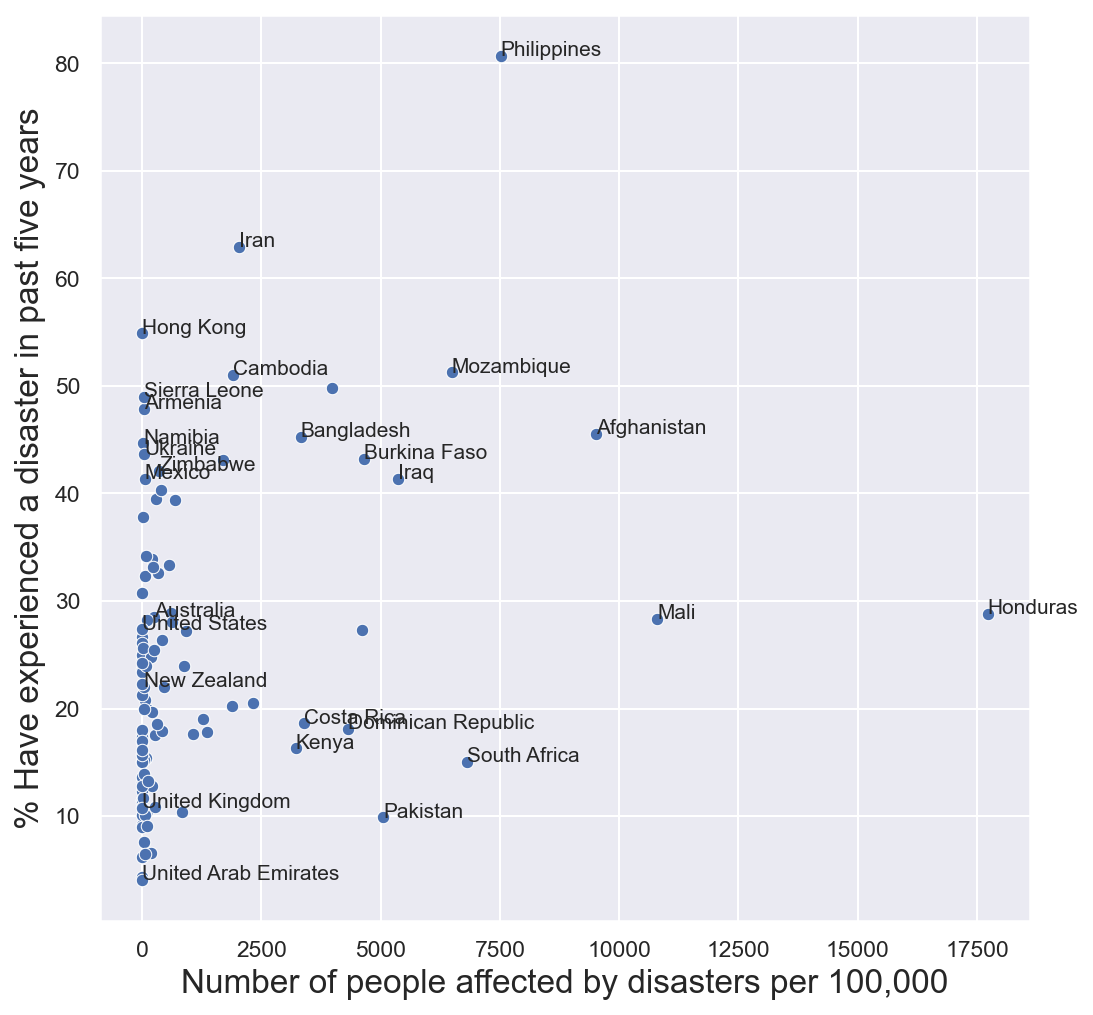

In [114]:
# List of countries to label
countries_to_label = ['United Kingdom','Afghanistan','Bangladesh','Dominican Republic','Honduras','Iraq','Kenya','Mali','Namibia','Pakistan','Philippines','South Africa','New Zealand','Australia','United States','Ukraine','Burkina Faso','Costa Rica','Zimbabwe','Namibia','Mexico','Hong Kong','Iran','Cambodia','Armenia','Sierra Leone','United Arab Emirates','Mozambique']

plt.figure(figsize=(8, 8),dpi=150)

# Create the linear regression plot
sns.scatterplot(
    data=merged_disaster,
    x='Number of people affected by disasters per 100,000', 
    y='Percentage_disaster_ex', 
)

# Add country names as labels to the points
for i, row in merged_disaster.iterrows():
    if row['Country'] in countries_to_label:
        plt.text(row['Number of people affected by disasters per 100,000'], row['Percentage_disaster_ex'], row['Country'], fontsize=10)

# Set x and y axis labels
plt.xlabel('Number of people affected by disasters per 100,000',fontsize=16)
plt.ylabel('% Have experienced a disaster in past five years',fontsize=16)
#plt.xscale('log')
plt.savefig('./Figures/Disaster_experience_vs_actual.pdf')
# Display the plot
plt.show()


In [115]:
merged_res = merged_disaster.merge(resilience_index, on='Country', how='inner')
merged_res.head()

Country  Year  Death rates from disasters  \
0  Afghanistan  2020                    1.700606   
1      Albania  2020                    0.000000   
2      Algeria  2020                    0.110379   
3    Argentina  2020                    0.013264   
4      Armenia  2020                    0.000000   

   Number of people affected by disasters per 100,000  Percentage_disaster_ex  \
0                                        9519.594000                45.573441   
1                                           0.980835                30.730731   
2                                          50.602490                 7.615230   
3                                          95.564514                19.980020   
4                                          33.694397                47.887324   

                GlobalRegion  resilience_index  
0                 South Asia          0.286347  
1            Southern Europe          0.300214  
2               North Africa          0.376750  
3  Latin America & Caribbean          0.403610  
4               Central Asia          0.445351

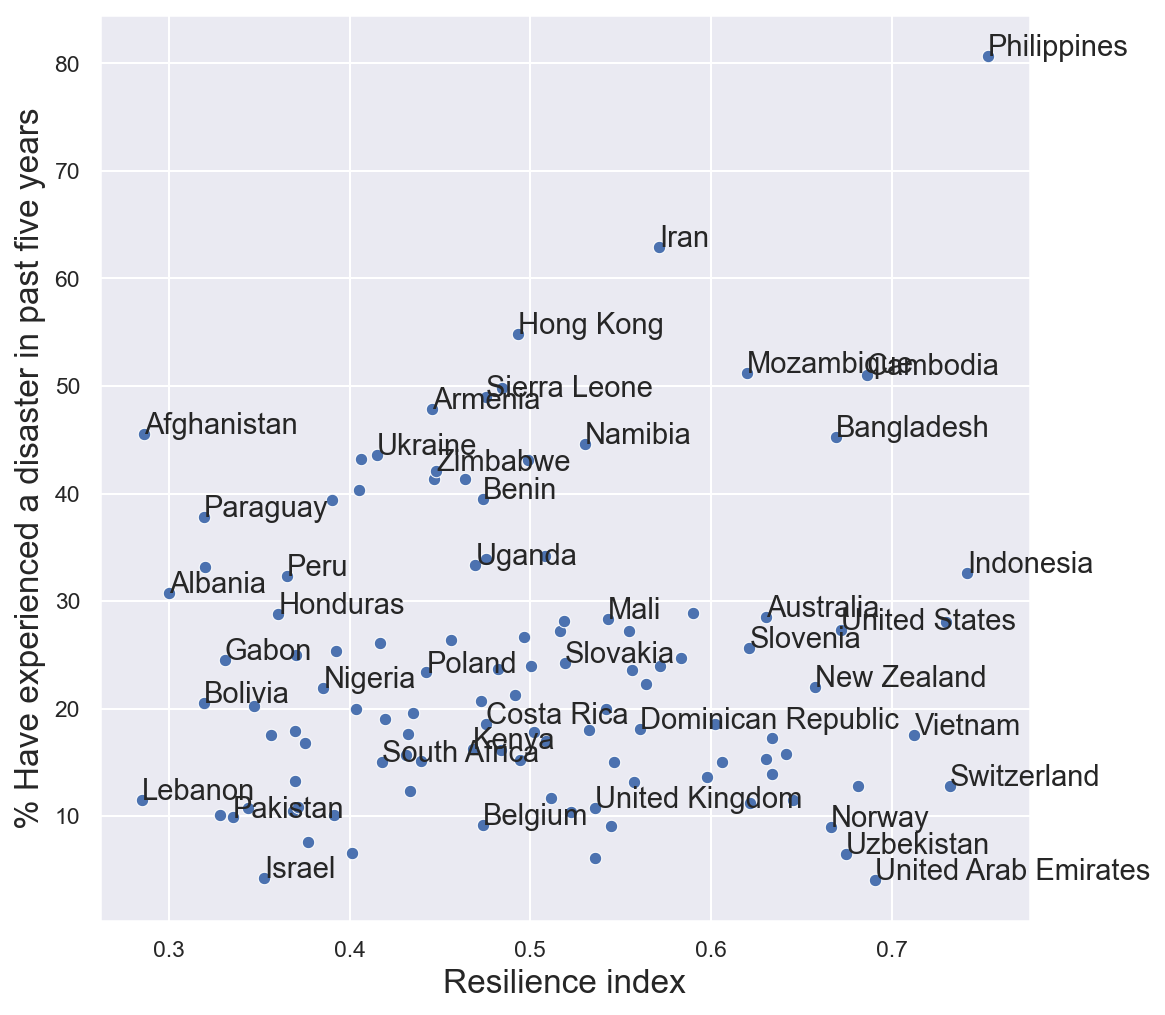

In [116]:

# List of countries to label
countries_to_label = ['United Kingdom','Afghanistan','Bangladesh','Dominican Republic','Honduras','Philippines','Kenya','Mali','Namibia','Pakistan','Philippines','South Africa','New Zealand','Australia','United States','Ukraine','Costa Rica','Zimbabwe','Namibia','Indonesia','Hong Kong','Iran','Cambodia','Armenia','Sierra Leone','United Arab Emirates','Mozambique','Switzerland','Vietnam','Belgium','Norway','Israel','Uzbekistan','Lebanon','Albania','Paraguay','Peru','Benin','Uganda','Uzbekistan','Gabon','Bolivia','Nigeria','Poland','Slovakia','Australia','Slovenia','New Zealand']
#countries_to_label =  merged_res.Country.unique()
plt.figure(figsize=(8, 8),dpi=150)

# Create the linear regression plot
sns.scatterplot(
    data=merged_res,
    x='resilience_index', 
    y='Percentage_disaster_ex', 
)

# Add country names as labels to the points
for i, row in merged_res.iterrows():
    if row['Country'] in countries_to_label:
        plt.text(row['resilience_index'], row['Percentage_disaster_ex'], row['Country'], fontsize=14)

# Set x and y axis labels
plt.xlabel('Resilience index', fontsize=16)
plt.ylabel('% Have experienced a disaster in past five years',fontsize=16)

plt.savefig('./Figures/Disaster_experience_vs_resilience.pdf')
# Display the plot
plt.show()


In [117]:
filtered_data = merged_res[(merged_res['resilience_index'] < 0.4) & (merged_res['Death rates from disasters'] <0.05)]
filtered_data

Country  Year  Death rates from disasters  \
1    Albania  2020                    0.000000   
17     Chile  2020                    0.000000   
31     Gabon  2020                    0.000000   
32   Georgia  2020                    0.000000   
34     Ghana  2020                    0.016388   
45    Israel  2020                    0.026644   
54   Lebanon  2020                    0.000000   
60   Moldova  2020                    0.000000   
75  Paraguay  2020                    0.049723   
80   Romania  2020                    0.006868   
98      Togo  2020                    0.043431   
99   Tunisia  2020                    0.027297   

    Number of people affected by disasters per 100,000  \
1                                            0.980835    
17                                           1.916909    
31                                           0.000000    
32                                         107.514020    
34                                           5.510752    
45                                           0.079932    
54                                           0.000000    
60                                           0.000000    
75                                          29.833817    
80                                           2.162988    
98                                         225.049600    
99                                         123.142710    

    Percentage_disaster_ex               GlobalRegion  resilience_index  
1                30.730731            Southern Europe          0.300214  
17               10.140562  Latin America & Caribbean          0.391069  
31               24.549098     Central/Western Africa          0.330843  
32               10.510511               Central Asia          0.368445  
34               16.850552     Central/Western Africa          0.375192  
45                4.300000                Middle East          0.352546  
54               11.519364                Middle East          0.285080  
60               25.025126             Eastern Europe          0.370574  
75               37.837838  Latin America & Caribbean          0.319474  
80               10.865191             Eastern Europe          0.371488  
98               33.164300     Central/Western Africa          0.319996  
99               13.300000               North Africa          0.369499

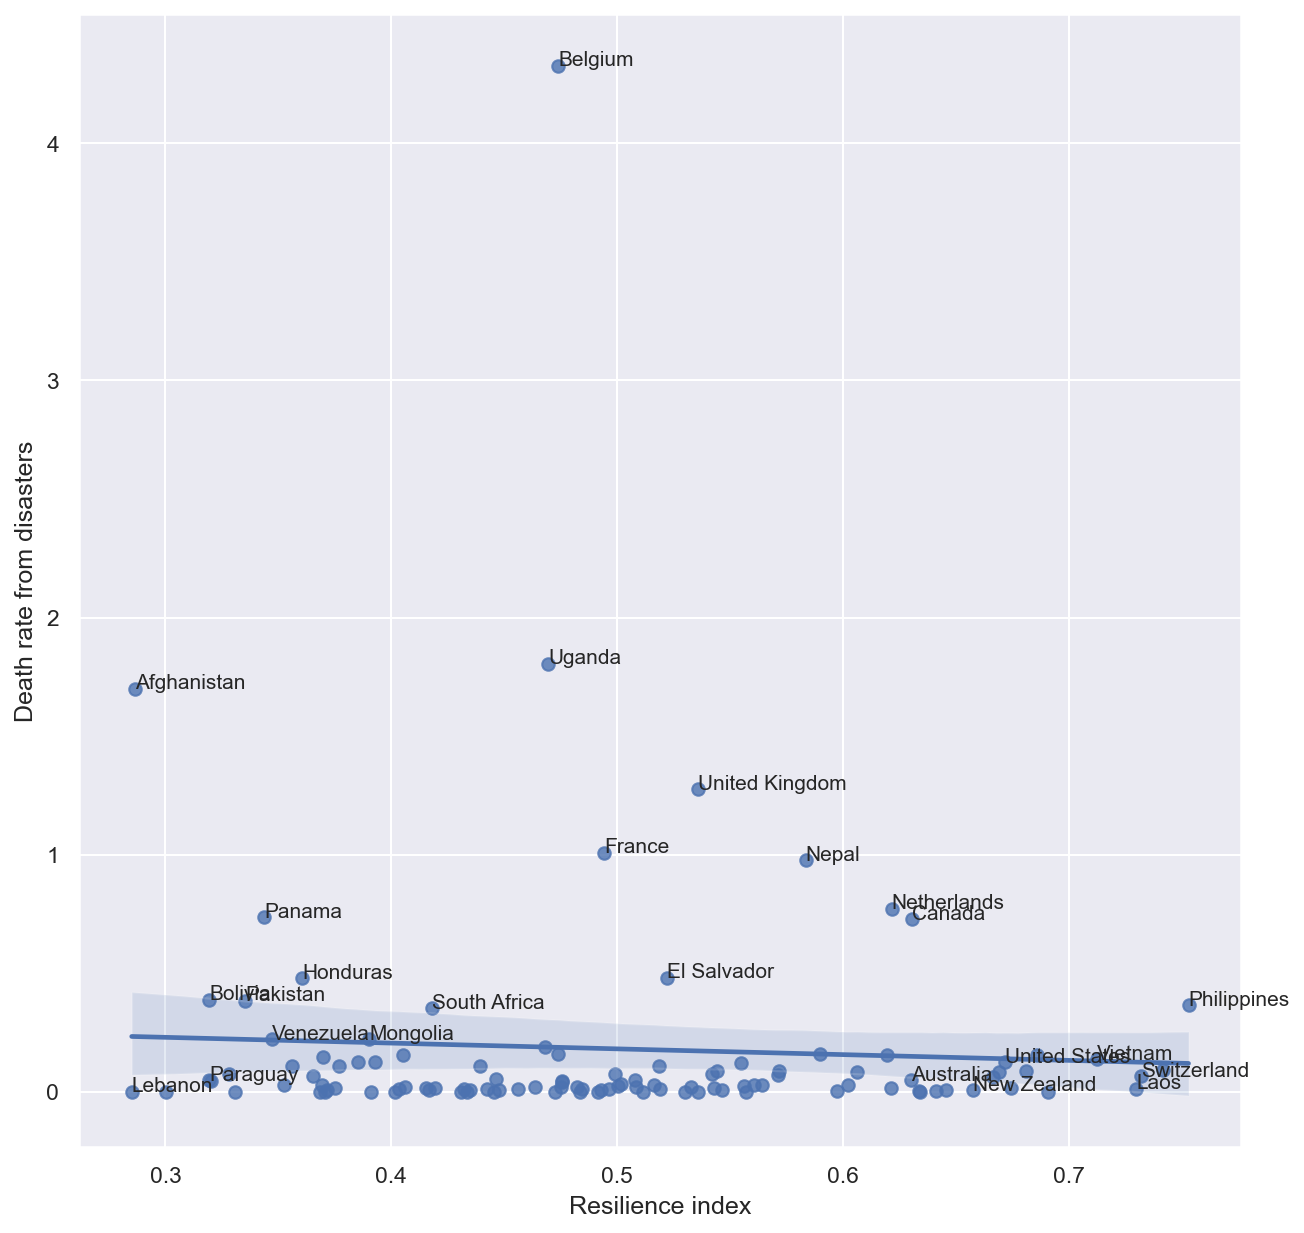

In [118]:
# List of countries to label
countries_to_label = ['United Kingdom','Afghanistan','Belgium','Bolivia','Canada','El Salvador','France','Honduras','Mongolia','Nepal','Netherlands','Pakistan','New Zealand','Australia','United States','Panama','Philippines','South Africa','Uganda','Venezuela','Afghanistan','Vietnam','Switzerland','Laos','Bolivia','Paraguay','Lebanon','']

plt.figure(figsize=(10, 10),dpi=150)

# Create the linear regression plot
sns.regplot(
    data=merged_res,
    x='resilience_index', 
    y='Death rates from disasters', 
)

# Add country names as labels to the points
for i, row in merged_res.iterrows():
    if row['Country'] in countries_to_label:
        plt.text(row['resilience_index'], row['Death rates from disasters'], row['Country'], fontsize=10)

# Set x and y axis labels
plt.xlabel('Resilience index')
plt.ylabel('Death rate from disasters')

plt.savefig('./Figures/Disaster_actual_vs_resilience.pdf')
# Display the plot
plt.show()